In [162]:
import pandas as pd 
import pyarrow as pa 
import numpy as np 
import os 
import seaborn as sb
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.stattools as tsa
import random
import scipy.stats as stats

In [163]:

plt.rcParams["font.family"] = "Calibri"

In [164]:
model_attributes = ["population", "total_exchanges", "total_agents_created", "total_avg_price",
                     "runtime", "agent_wealth", "price_variance",# "preference_variance", 
                     #"water_avg_price", "sugar_avg_price", "price_variance",# "water_variance", "sugar_variance",
                       "real_income_per_capital", "wealth_per_capita", "savings", "income", "consumption",
                        "num_basics", "num_optimizers", "num_herders",
                        #"basicbasic_res_demand", "basicherder_res_demand", "arbitrageurbasic_res_demand", "arbitrageurherder_res_demand", 
                        "mutate_rate", "price_change", "reservation_ratio", "reproduction_criteria_water", "reproduction_criteria_sugar", "reproduction_ratio_water", "reproduction_ratio_sugar"]

runs = 100
pullable_cols = ["total_exchanges", "runtime", "population",  "total_avg_price", "agent_wealth", "wealth_per_capita", "real_income_per_capital", "mutate_rate", "price_change", "reservation_ratio", "reproduction_criteria_sugar", "reproduction_criteria_water", "reproduction_ratio_water", "reproduction_ratio_sugar", "num_basics", "num_optimizers", "num_herders","num_wealth_herders", "num_progenycount_herders"]
cols = ["total_exchanges", "runtime", "population",  "total_avg_price", "agent_wealth", "wealth_per_capita", "real_income_per_capital", "mutate_rate", "price_change", "reservation_ratio", "reproduction_criteria_sugar", "reproduction_criteria_water", "reproduction_ratio_water", "reproduction_ratio_sugar", "num_basics", "num_optimizers", "num_herders","num_wealth_herders", "num_progenycount_herders"]

In [165]:
primary_breed_set = ["basic", "optimizer", "basic-optimizer"]
data_by_breeds = {}
for breed_set in primary_breed_set: 
    data_by_breeds[breed_set] = {}
    for attr in pullable_cols: 
   

            data_by_breeds[breed_set][attr] = pd.read_parquet("C://Users//NDSU-Prof//Documents//GitHub//Academics//Sugarscape_Alt -10-25-2023//parquet/" + breed_set + "/" + attr + "/" + attr + "_df")
       

#### This code pulls the final price - the equillibrium - from each run 

In [5]:
price_data = {}
for breed_set in primary_breed_set: 
    price_data[breed_set] = []
    for run in range(runs):
        try: 
            price_data[breed_set].append((data_by_breeds[breed_set]["total_avg_price"][run].dropna().mean()))
        except: 
            pass

In [6]:
price_data = pd.DataFrame.from_dict(price_data)
price_data

basic  optimizer  basic-optimizer
0   1.027894   1.005038         1.006739
1   1.023381   1.005660         1.006145
2   1.036979   1.004512         1.007025
3   1.028829   1.005249         1.005536
4   1.033360   1.005577         1.009942
..       ...        ...              ...
95  1.025830   1.004640         1.006744
96  1.025585   1.004276         1.006398
97  1.024537   1.004773         1.011887
98  1.029088   1.005603         1.008202
99  1.039894   1.005892         1.005546

[100 rows x 3 columns]

#### This code gets the standard deviation of the price equillibriums by breed set

In [7]:
for breeds in price_data.keys(): 
    print(breeds + ": " + str(np.average(price_data[breeds])))

basic: 1.0284812510013581
optimizer: 1.0047609782218934
basic-optimizer: 1.0063839447498322


Text(0.5, 1.0, 'Price Distribution by Breed')

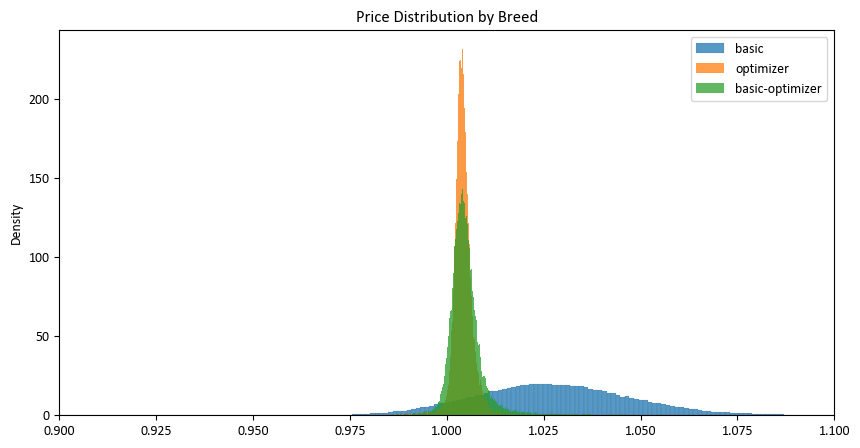

In [8]:
fig, ax = plt.subplots(figsize = (10, 5))
for i, breeds in enumerate(price_data.keys()): 
    sb.histplot(data_by_breeds[breeds]["total_avg_price"].mean(axis=1), color="C" + str(i), label=breeds, legend="full", kde=False, stat="density", ax=ax)
ax.set_xlim(xmax=1.1, xmin = 0.9)

ax.legend()

ax.set_title("Price Distribution by Breed")
    

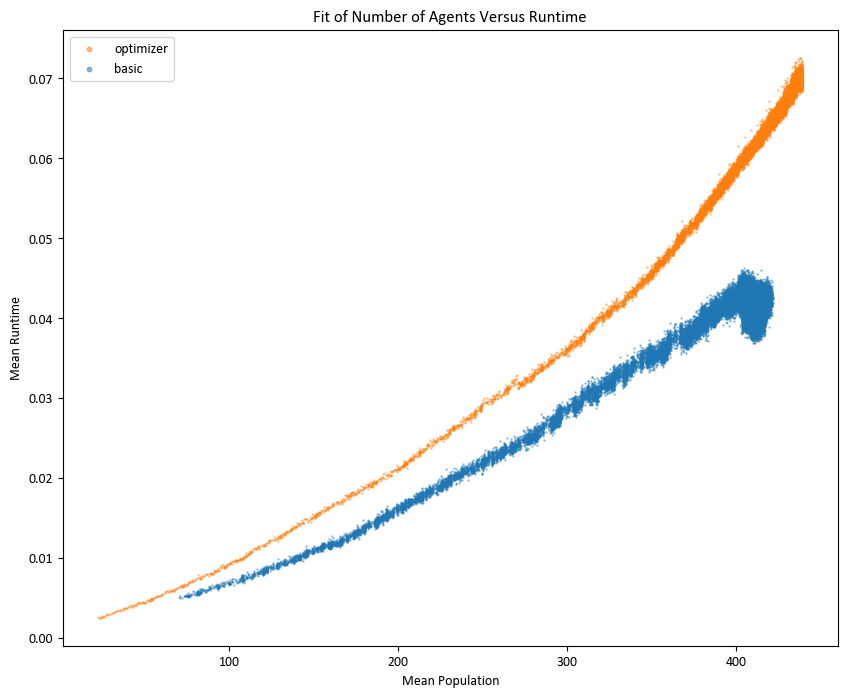

In [9]:
fig, ax = plt.subplots(figsize=(10,8))

x = data_by_breeds["optimizer"]["population"][50:].mean(axis=1)
y = data_by_breeds["optimizer"]["runtime"][50:].mean(axis=1)

coefficients = np.polyfit(x, y, 2)

polynomial = np.poly1d(coefficients)

x_fit = np.linspace(x.min(), x.max(), 1000)

y_fit = polynomial(x_fit)

plt.scatter(x, y, s=0.4, alpha=0.5, c="C1", label="optimizer")

#plt.plot(x_fit, y_fit, color="k", ls="--")  # Red line for the quadratic fit
x = data_by_breeds["basic"]["population"][50:].mean(axis=1)
y = data_by_breeds["basic"]["runtime"][50:].mean(axis=1)

coefficients = np.polyfit(x, y, 1)

polynomial = np.poly1d(coefficients)

x_fit = np.linspace(x.min(), x.max(), 1000)

y_fit = polynomial(x_fit)

plt.scatter(x, y, s=0.4, alpha=0.5, label="basic")

#plt.plot(x_fit, y_fit, color='k', ls="--")  # Red line for the quadratic fit

plt.xlabel('Mean Population')  # Or appropriate label based on your data
plt.ylabel('Mean Runtime')  # Or appropriate label based on your data
plt.title('Fit of Number of Agents Versus Runtime')
plt.legend(markerscale=5)

#ax.set_yscale("log")
#ax.set_xscale("log")
#ax.set_xlim(xmin=100)
#ax.set_ylim(ymax=.06)

plt.show()

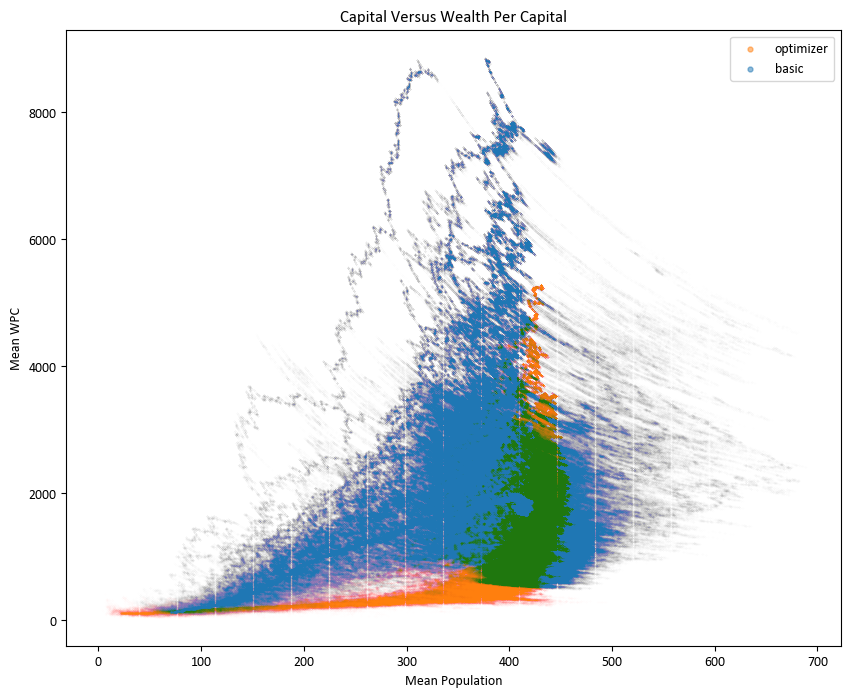

In [5]:
fig, ax = plt.subplots(figsize=(10,8))

x = data_by_breeds["optimizer"]["population"][50:]#.mean(axis=1)
y = data_by_breeds["optimizer"]["wealth_per_capita"][50:]#.mean(axis=1)
plt.scatter(x, y, s=0.1, alpha=0.01, c="C1", label=None)
x = data_by_breeds["optimizer"]["population"][50:].mean(axis=1)
y = data_by_breeds["optimizer"]["wealth_per_capita"][50:].mean(axis=1)
plt.scatter(x, y, s=0.5, alpha=0.5, c="C1", label="optimizer")

#coefficients = np.polyfit(x, y, 2)

#polynomial = np.poly1d(coefficients)

#x_fit = np.linspace(x.min(), x.max(), 1000)

#y_fit = polynomial(x_fit)

#plt.scatter(x, y, s=0.1, alpha=0.1, c="C1", label="optimizer")

#plt.plot(x_fit, y_fit, color="k", ls="--")  # Red line for the quadratic fit
x = data_by_breeds["basic"]["population"][50:]#.mean(axis=1)
y = data_by_breeds["basic"]["wealth_per_capita"][50:]#.mean(axis=1)
plt.scatter(x, y, s=0.1, alpha=0.01, c="C0", label=None)
x = data_by_breeds["basic"]["population"][50:].mean(axis=1)
y = data_by_breeds["basic"]["wealth_per_capita"][50:].mean(axis=1)
plt.scatter(x, y, s=0.5, alpha=0.5, c="C0", label="basic")

#coefficients = np.polyfit(x, y, 1)

#polynomial = np.poly1d(coefficients)

#x_fit = np.linspace(x.min(), x.max(), 1000)

#y_fit = polynomial(x_fit)

#plt.scatter(x, y, s=0.1, alpha=0.01, label="basic")

#plt.plot(x_fit, y_fit, color='k', ls="--")  # Red line for the quadratic fit

plt.xlabel('Mean Population')  # Or appropriate label based on your data
plt.ylabel('Mean WPC')  # Or appropriate label based on your data
plt.title('Capital Versus Wealth Per Capital')
plt.legend(markerscale=5)

#ax.set_yscale("log")
#ax.set_xscale("log")
#ax.set_xlim(xmin=100)
#ax.set_ylim(ymax=.06)

plt.show()

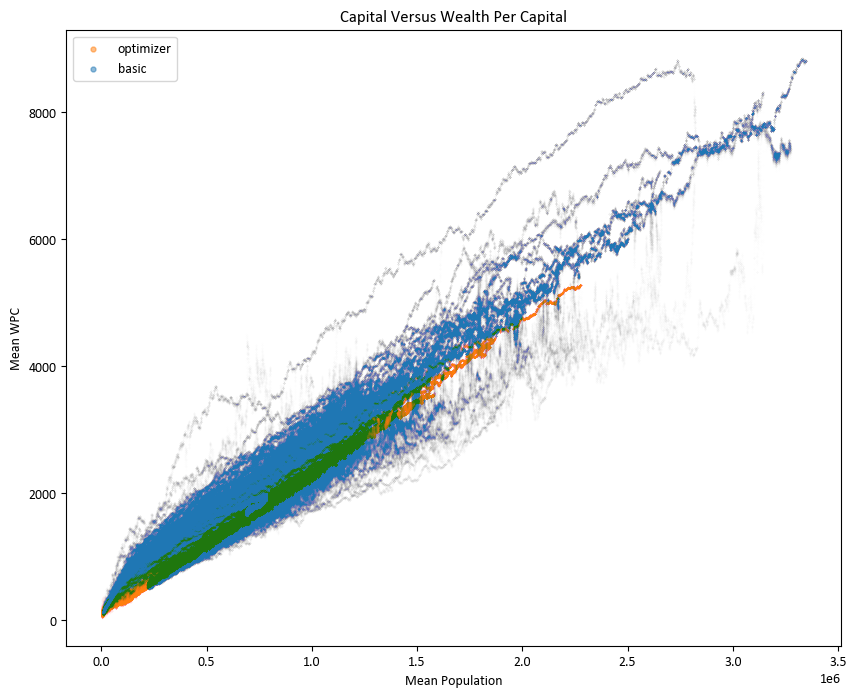

In [6]:
fig, ax = plt.subplots(figsize=(10,8))

x = data_by_breeds["optimizer"]["agent_wealth"][50:]#.mean(axis=1)
y = data_by_breeds["optimizer"]["wealth_per_capita"][50:]#.mean(axis=1)
plt.scatter(x, y, s=0.1, alpha=0.01, c="C1", label=None)
x = data_by_breeds["optimizer"]["agent_wealth"][50:].mean(axis=1)
y = data_by_breeds["optimizer"]["wealth_per_capita"][50:].mean(axis=1)
plt.scatter(x, y, s=0.5, alpha=0.5, c="C1", label="optimizer")

#coefficients = np.polyfit(x, y, 2)

#polynomial = np.poly1d(coefficients)

#x_fit = np.linspace(x.min(), x.max(), 1000)

#y_fit = polynomial(x_fit)

#plt.scatter(x, y, s=0.1, alpha=0.1, c="C1", label="optimizer")

#plt.plot(x_fit, y_fit, color="k", ls="--")  # Red line for the quadratic fit
x = data_by_breeds["basic"]["agent_wealth"][50:]#.mean(axis=1)
y = data_by_breeds["basic"]["wealth_per_capita"][50:]#.mean(axis=1)
plt.scatter(x, y, s=0.1, alpha=0.01, c="C0", label=None)
x = data_by_breeds["basic"]["agent_wealth"][50:].mean(axis=1)
y = data_by_breeds["basic"]["wealth_per_capita"][50:].mean(axis=1)
plt.scatter(x, y, s=0.5, alpha=0.5, c="C0", label="basic")

#coefficients = np.polyfit(x, y, 1)

#polynomial = np.poly1d(coefficients)

#x_fit = np.linspace(x.min(), x.max(), 1000)

#y_fit = polynomial(x_fit)

#plt.scatter(x, y, s=0.1, alpha=0.01, label="basic")

#plt.plot(x_fit, y_fit, color='k', ls="--")  # Red line for the quadratic fit

plt.xlabel('Mean Population')  # Or appropriate label based on your data
plt.ylabel('Mean WPC')  # Or appropriate label based on your data
plt.title('Capital Versus Wealth Per Capital')
plt.legend(markerscale=5)

#ax.set_yscale("log")
#ax.set_xscale("log")
#ax.set_xlim(xmin=100)
#ax.set_ylim(ymax=.06)

plt.show()

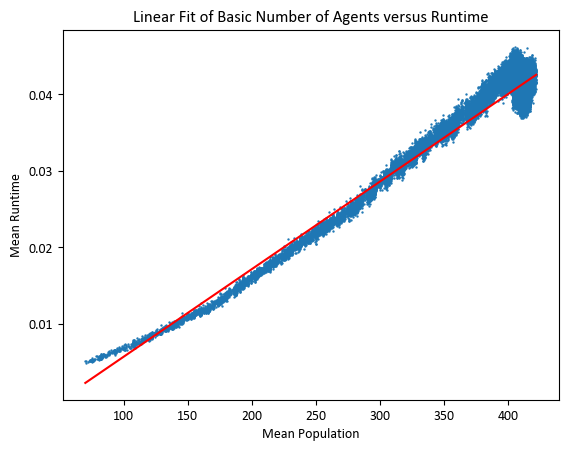

In [7]:
x = data_by_breeds["basic"]["population"][50:].mean(axis=1)
y = data_by_breeds["basic"]["runtime"][50:].mean(axis=1)

coefficients = np.polyfit(x, y, 1)

polynomial = np.poly1d(coefficients)

x_fit = np.linspace(x.min(), x.max(), 1000)

y_fit = polynomial(x_fit)

plt.scatter(x, y, s=0.5)

plt.plot(x_fit, y_fit, color='r')  # Red line for the quadratic fit

plt.xlabel('Mean Population')  # Or appropriate label based on your data
plt.ylabel('Mean Runtime')  # Or appropriate label based on your data
plt.title('Linear Fit of Basic Number of Agents versus Runtime')

plt.show()

In [28]:
from scipy.stats import gmean
import statsmodels.api as sm

In [137]:
x_attr = "num_herders"
y_attr = "population"

fig, ax = plt.subplots(figsize=(10,5))


for i, breed in enumerate(["basic"]): 
    last = len(data_by_breeds[breed][x_attr][0])-1
#     for j in range(5000,last+1,5000):
        
    x = (data_by_breeds[breed][x_attr].iloc[5000::5000] / data_by_breeds[breed]["population"].iloc[5000::5000])  #/ data_by_breeds[breed]["population"].iloc[last])
    y = data_by_breeds[breed][y_attr].iloc[5000::5000]
    c =  pd.DataFrame([x.apply(lambda x: x.name % 10, axis=0) for j in x.index], index=x.index)
    
    #         plt.scatter(x, y, s=25, c="C"+str(i), label=breed)

    #coefficients = np.polyfit(x, y, 2)

    #polynomial = np.poly1d(coefficients)

    #x_fit = np.linspace(x.min(), x.max(), 1000)

    #y_fit = polynomial(x_fit)

    plt.scatter(x, y, s=25, c = c, cmap = "Blues", label=breed)
    
    #print(sm.OLS(y, sm.add_constant(x)).fit().summary())
    

    #plt.plot(x_fit, y_fit, color='k', ls="--")  # Red line for the quadratic fit

    plt.xlabel(f'Final Proportion of Herders')  # Or appropriate label based on your data
    plt.ylabel(f'Mean {y_attr.replace("_", " ").title()}')  # Or appropriate label based on your data
    plt.title(f'{y_attr.replace("_", " ").title()} versus Herding Rate')
    ax.legend()
    #ax.set_xlim(xmin=-0.01, xmax=0.2)
    #ax.set_yscale("log")
    #ax.set_xscale("log")
    #plt.show()

In [140]:
x.name

AttributeError: 'DataFrame' object has no attribute 'name'

In [87]:
df = x.apply(lambda x: str("C" + str(x.name % 10)), axis=0)
df

0     C0
1     C1
2     C2
3     C3
4     C4
      ..
95    C5
96    C6
97    C7
98    C8
99    C9
Length: 100, dtype: object

In [9]:
attr = "mutate_rate"

log = False

fig, ax = plt.subplots(figsize=(10, 5))

if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()

for i, breed in enumerate(data_by_breeds.keys()): 
    sb.lineplot(data= data_by_breeds[breed][attr][100:].mean(axis=1),lw=1, alpha = 1, color="C"+str(i), label=breed, ax=ax)
    sb.lineplot(data= data_by_breeds[breed][attr][100:], lw=0.2, alpha=.2, palette=["C" + str(i)]*runs, label=None, legend=False, ax=ax)
        


ax.set_xlabel("Period")
ax.set_ylabel(f"{attr_string}")
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Period")
else: 
    ax.set_title(f"{attr_string} by Period")

ax.legend()

In [1099]:
attr = "price_change"

log = False

fig, ax = plt.subplots(figsize=(10, 5))

if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()

for i, breed in enumerate(data_by_breeds.keys()): 
    sb.lineplot(data= data_by_breeds[breed][attr][100:].mean(axis=1),lw=2, alpha = 1, color="C"+str(i), label=breed, ax=ax)
    #sb.lineplot(data= data_by_breeds[breed][attr][100:], lw=0.25, alpha=.5, palette=["C" + str(i)]*runs, label=None, legend=False, ax=ax)
        


ax.set_xlabel("Period")
ax.set_ylabel(f"{attr_string}")
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Period")
else: 
    ax.set_title(f"{attr_string} by Period")

ax.legend()

In [14]:
attr = "mutate_rate"

log = False

fig, ax = plt.subplots(figsize=(10, 5))

if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()

for i, breed in enumerate(data_by_breeds.keys()): 
  
        
    last = len(data_by_breeds[breed][attr]) - 1
    #ax.axvline(data_by_breeds[breed][attr].iloc[last].mean(), color="C"+str(i))
    #sb.histplot(data=data_by_breeds[breed][attr].iloc[last], alpha=.5, label=breed, color="C"+str(i), bins=20, legend=False, stat="density", ax=ax)
    sb.histplot(data=data_by_breeds[breed][attr].iloc[last], alpha=.5, label=breed + f" period {last+1}", kde=False, color="C"+str(i), bins=20,  stat="density", legend=False, ax=ax)
        
        
#ax.set_xlim(xmin=0.1, xmax=0.15)
#ax.axvline(((np.log(0.5)-np.log(0.02))/(0.5-0.02)), linestyle = "--", color = "k", label = "Mean of Initial Distribution")

ax.set_xlabel("Mutate Rate")
ax.set_ylabel(f"Density")
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Period")
else: 
    ax.set_title(f"Initial Distribution of Means of {attr_string} ({runs} Runs)")

ax.legend()

In [73]:
uniform_data


array([482139.24842929, 952235.32061175, 792412.67244689, 447036.51161187,
       375237.10410216, 742976.25293978, 216943.50241861, 428422.22838834,
        13588.00966588, 905985.00831457, 483517.29235521, 125756.73702011,
       996434.80015665, 111727.41055614, 298128.97192356, 245995.04330244,
       973813.98491818, 499159.64821777, 764358.05069438, 944330.03753331,
       405342.43814628,  65290.59642502, 784427.59772569, 279406.68504031,
       394644.65189081,   9493.84838043, 431517.82378516, 169508.24193828,
       678492.62105903, 716250.10525379, 620790.29764523, 235095.98178309,
        28169.87035624, 380274.47012758, 699650.98118732, 567782.52712164,
       856117.84993768, 378397.0731279 , 125766.57060892, 549668.24089521,
        21825.76088668, 818159.37133105, 144459.49463594, 420271.89278251,
       478455.96127546, 443032.00090775, 109914.98868963,  78919.53533358,
       596030.27059845, 182192.00976999])

In [106]:
# To plot the probability density function (PDF) of the inverse uniform distribution, 
# we need to define the PDF and then plot it.
num_vals = 10000


def inverse_uniform_pdf(x):
    """ Probability density function of the inverse uniform distribution. """
    return ((1 / (x**2) ) * (1/(.5-.02)) ) / num_vals



# Generate a range of values for plotting the PDF
x = np.linspace(0.02, 0.5, num_vals)  # Starting from 1 to avoid division by zero
pdf_values = [inverse_uniform_pdf(value) for value in x]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_values, lw=2, color='k')
plt.fill_between(x, pdf_values, alpha=0.3, color='k')
plt.title("Probability Density Function of an Inverse Uniform Distribution")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.ylim(bottom=0)  # Ensuring the y-axis starts from 0
plt.show()

In [36]:
(np.log(0.5)-np.log(0.02))/(0.5-0.02) * 0.01

0.06705991301808752

In [11]:
attr = "mutate_rate"

log = False

fig, ax = plt.subplots(figsize=(10, 5))

if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()

for i, breed in enumerate(data_by_breeds.keys()): 
 
    sb.lineplot(data= ( data_by_breeds[breed][attr]).mean(axis=1),lw=2, alpha = 1, color="C"+str(i), label=breed, ax=ax)
    #sb.lineplot(data= data_by_breeds[breed][attr], lw=0.2, alpha=.5, palette=["C" + str(i)]*runs, label=None, legend=False, ax=ax)
        
ax.axhline(data_by_breeds[breed][attr].iloc[0].mean(), linestyle = "--", color = "k", label = "Mean of Initial Distribution")

ax.set_xlabel("Log Period")
ax.set_ylabel(f"{attr_string}")
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Period")
else: 
    ax.set_title(f"Mean {attr_string} by Period Across {runs} Runs")

ax.set_xscale("log")
ax.set_xlim(xmin=5)
ax.legend()

In [10]:
attr = "mutate_rate"

log = False

fig, ax = plt.subplots(figsize=(10, 5))

if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()

for i, breed in enumerate(data_by_breeds.keys()): 
 
    sb.lineplot(data= ( data_by_breeds[breed][attr]).mean(axis=1),lw=2, alpha = 1, color="C"+str(i), label=breed, ax=ax)
    sb.lineplot(data= data_by_breeds[breed][attr], lw=0.2, alpha=.5, palette=["C" + str(i)]*runs, label=None, legend=False, ax=ax)
        
ax.axhline(data_by_breeds[breed][attr].iloc[0].mean(), linestyle = "--", color = "k", label = "Mean of Initial Distribution")

ax.set_xlabel("Log Period")
ax.set_ylabel(f"{attr_string}")
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Period")
else: 
    ax.set_title(f"Mean {attr_string} by Period Across {runs} Runs")

ax.set_xscale("log")
ax.set_xlim(xmin=5)
ax.legend()

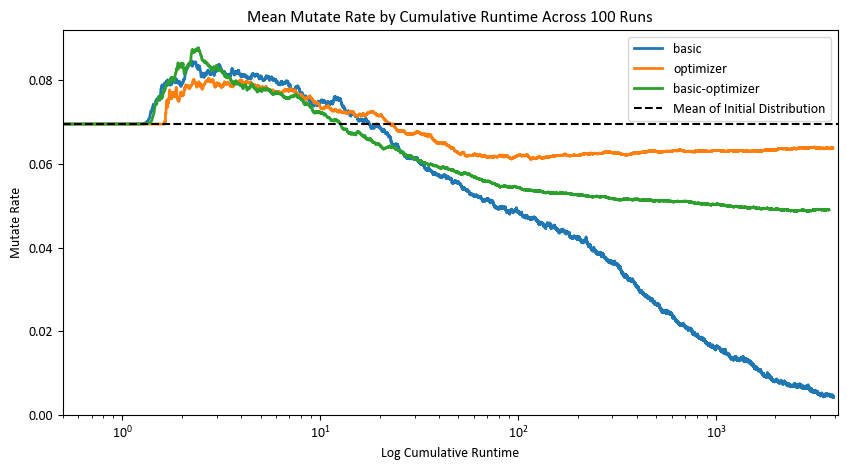

In [10]:
attr = "mutate_rate"

log = False

fig, ax = plt.subplots(figsize=(10, 5))

if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()

for j, breed in enumerate(data_by_breeds.keys()):

    te = np.cumsum(data_by_breeds[breed]["runtime"])
    attr_df = data_by_breeds[breed][attr]

    #for run in range(runs):
      #  sb.lineplot(y=attr_df[run], x=te[run], alpha=0.25, color=f"C{j}", palette=[f"C{j}"] * runs, lw=0.5, ax=ax)

    sb.lineplot(x=te.mean(axis=1), lw=2, y=attr_df.mean(axis=1), color=f"C{j}", alpha=1, label=breed, ax=ax)
ax.axhline(data_by_breeds[breed][attr].iloc[0].mean(), linestyle = "--", color = "k", label = "Mean of Initial Distribution")
ax.set_xlabel("Log Cumulative Runtime")
ax.set_ylabel(f"{attr_string}")
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Period")
else: 
    ax.set_title(f"Mean {attr_string} by Cumulative Runtime Across {runs} Runs")

ax.set_xlim(xmin=0.5)
ax.set_xscale("log")
ax.legend()

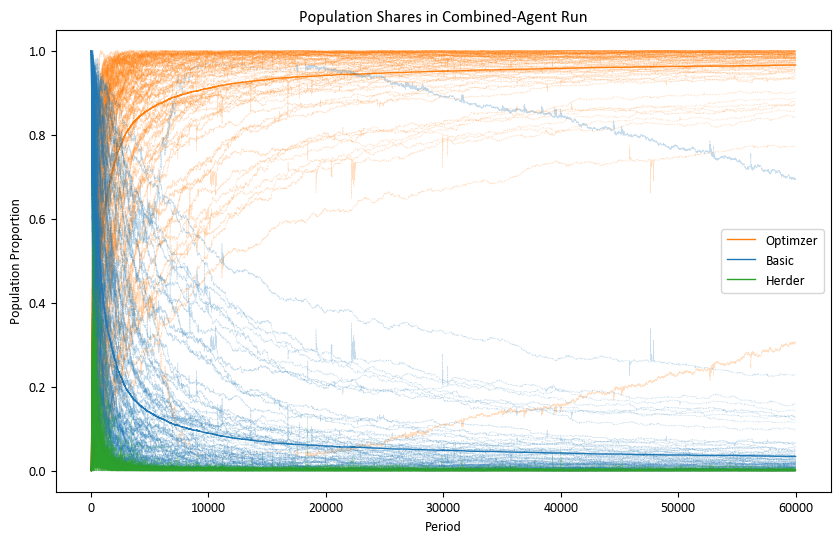

In [52]:
fig, ax = plt.subplots(figsize=(10,6))

data = data_by_breeds["basic-optimizer"]
population = data["population"]
num_opt = data["num_optimizers"]
num_bas = data["num_basics"]
num_herders = data["num_herders"]

sb.lineplot(data=(num_opt / population), palette = ["C1"]*runs, ax=ax, lw = 0.5, alpha=0.25, legend=None)
sb.lineplot(data=(num_opt / population).mean(axis=1), color ="C1", ax=ax, lw = 1, alpha=1, legend=None, label="Optimzer")

sb.lineplot(data=(num_bas / population), palette = ["C0"]*runs, ax=ax, lw = 0.5, alpha=0.25, legend=None)
sb.lineplot(data=(num_bas / population).mean(axis=1), color ="C0", ax=ax, lw = 1, alpha=1, legend=None, label="Basic")

sb.lineplot(data=(num_herders / population), palette = ["C2"]*runs, ax=ax, lw = 0.5, alpha=0.25, legend=None)
sb.lineplot(data=(num_herders / population).mean(axis=1), color ="C2", ax=ax, lw = 1, alpha=1, legend=None, label="Herder")

ax.set_title("Population Shares in Combined-Agent Run")
ax.set_ylabel("Population Proportion")
ax.set_xlabel("Period")
ax.legend()

In [947]:
import scipy.stats.mstats as stats

x = 0.1
mutation_rate = 0.5

attr_vals = []

for i in range(2000): 
    if random.getrandbits(1) == 1: 
        attr_vals.append(np.exp(np.log(x) + random.random() * (np.log(x) * np.log(mutation_rate))))
    else: 
        attr_vals.append(np.exp(np.log(x) - random.random() * (np.log(x) * np.log(mutation_rate))))
        
print(stats.gmean(attr_vals))
        

0.09841705185992977


C:\Users\NDSU-Prof\AppData\Local\Temp\ipykernel_11824\1911106753.py:24: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(ymax=.07, ymin=-0.005)


(2.8744954189309865e-06, 0.07)

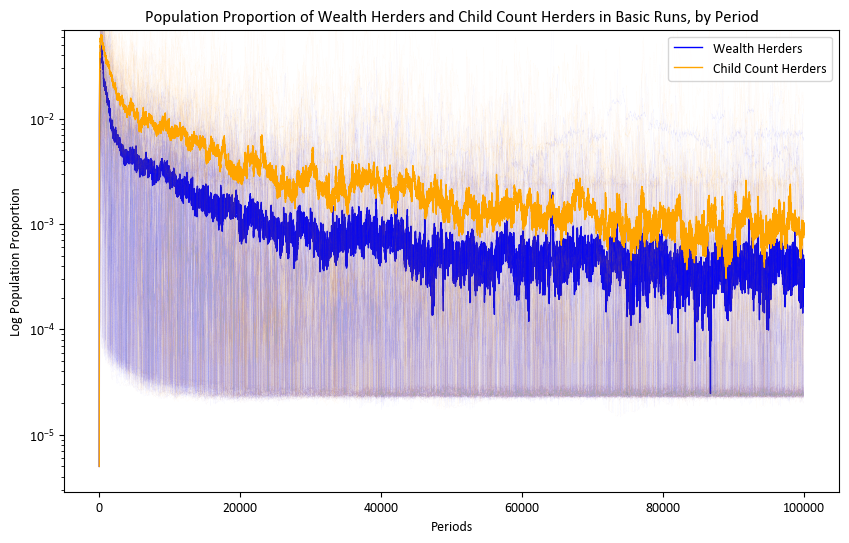

In [166]:
# herder share plot

fig, ax = plt.subplots(figsize=(10,6))

data = data_by_breeds["basic"]
population = data["population"]
num_wh = data["num_wealth_herders"]+
num_pch = data["num_progenycount_herders"]+.01
num_herders = data["num_herders"]+.01
prop_wh = (num_wh / population)
prop_pch = (num_pch / population)

sb.lineplot(data=prop_wh.rolling(window=100).mean(), palette = ["blue"]*runs, ax=ax, lw = 0.1, alpha=0.1, legend=None)
sb.lineplot(data=prop_wh.mean(axis=1), color ="blue", ax=ax, lw = 1, alpha=1, legend=None, label="Wealth Herders")
sb.lineplot(data=prop_pch.rolling(window=100).mean(), ax=ax, palette = ["orange"]*runs, lw=0.1, alpha=0.1,  legend=None)
sb.lineplot(data=prop_pch.mean(axis=1), color ="orange", ax=ax, lw = 1, alpha=1, legend=None, label = "Child Count Herders")

ax.legend(loc = "upper right")
ax.set_title("Population Proportion of Wealth Herders and Child Count Herders in Basic Runs, by Period")
ax.set_ylabel("Log Population Proportion")
ax.set_xlabel("Periods")

ax.set_yscale("log")
ax.set_ylim(ymax=.07, ymin=-0.005)
#ax.set_xlim(xmin=1)

In [53]:
wh_data = np.log(prop_wh.mean(axis=1)+0.00001).diff().dropna()
pch_data = np.log(prop_pch.mean(axis=1)+0.00001).diff().dropna()



In [54]:
wh_data.abs()

1        0.000000
2        0.000000
3        0.000000
4        0.418191
5        0.304875
           ...   
99995    0.066619
99996    0.140932
99997    0.259034
99998    0.399340
99999    0.001125
Length: 99999, dtype: float32

In [55]:
wh_data.

SyntaxError: invalid syntax (3308432634.py, line 1)

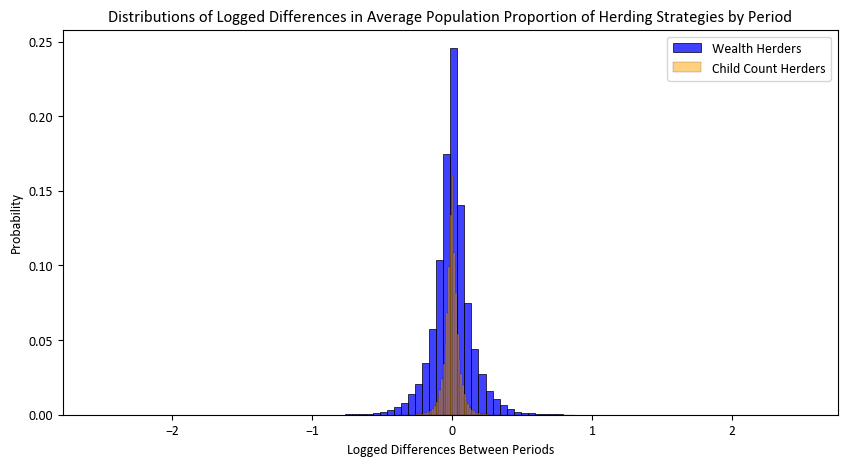

In [56]:
fig, ax = plt.subplots(figsize=(10,5))

wh_sd = wh_data.std()
pch_std = pch_data.std()

wh_normalized = (wh_data - wh_data.mean()) / wh_sd
pch_normalized = (pch_data - pch_data.mean()) / pch_std

sb.histplot(data = wh_data, bins=100,alpha=0.75, color = "blue", stat="probability", label = "Wealth Herders", ax=ax)
sb.histplot(data = pch_data, bins=100, alpha=0.5, color = "orange", stat="probability", label = "Child Count Herders", ax=ax)


ax.set_title("Distributions of Logged Differences in Average Population Proportion of Herding Strategies by Period")
ax.set_xlabel("Logged Differences Between Periods")
ax.legend()

In [57]:
# test on variances - absolute values of logged differences 

stats.ttest_ind(wh_data.abs(), pch_data.abs())

Ttest_indResult(statistic=173.12184667218526, pvalue=0.0)

In [58]:
wh_data.abs()


1        0.000000
2        0.000000
3        0.000000
4        0.418191
5        0.304875
           ...   
99995    0.066619
99996    0.140932
99997    0.259034
99998    0.399340
99999    0.001125
Length: 99999, dtype: float32

In [59]:
stats.ttest_ind(prop_wh.mean(axis=1), prop_pch.mean(axis=1))

Ttest_indResult(statistic=-100.03560256938161, pvalue=0.0)

In [106]:
stats.ttest_ind(prop_wh.iloc[39999], prop_pch.iloc[39999])

Ttest_indResult(statistic=-3.124585138193856, pvalue=0.002779501341872667)

take logdiffs and compare two series on self t tests to see which one is more stable 

In [12]:
fig, ax = plt.subplots(figsize=(12,6))

for i , breed in enumerate(data_by_breeds.keys()):
    
    cum_rt = np.cumsum(data_by_breeds[breed]["runtime"])[10:]

    
    for run in range(runs): 
        sb.lineplot(x = cum_rt[run], y = (data_by_breeds[breed]["num_herders"][run][10:] / data_by_breeds[breed]["population"][run][10:]).rolling(window=100).mean(), legend=None, color= "C"+str(i), lw=0.1, alpha = 0.2, ax=ax)
    
    
    sb.lineplot(x = cum_rt.mean(axis=1), y = (data_by_breeds[breed]["num_herders"][10:] / data_by_breeds[breed]["population"][10:]).mean(axis=1), color = f"C{i}", legend=None, lw=1, label=breed, ax=ax)
ax.legend()    

ax.set_ylabel("Population Proportion of Herders")
ax.set_xlabel("Log Cumulative Runtime")
ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_title("Population proportion of Herders by Log Cumulative Runtime")
ax.set_ylim(ymax=.2)
#ax.set_xlim(xmax=1500)

(-0.028107852742075924, 0.2)

basic
                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                 8.396e+06
Date:                Thu, 21 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:30:45   Log-Likelihood:             3.1172e+07
No. Observations:            10000000   AIC:                        -6.234e+07
Df Residuals:                 9999998   BIC:                        -6.234e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0021   4

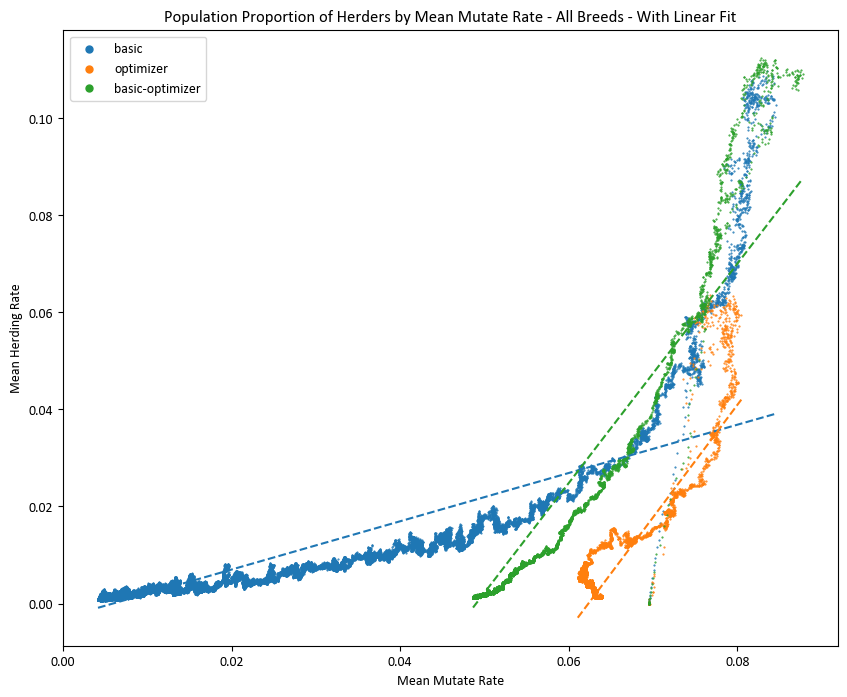

In [174]:
fig, ax = plt.subplots(figsize=(10, 8))

for i, breed in enumerate(data_by_breeds.keys()): 
    #plt.scatter(data_by_breeds[breed]["mutate_rate"][1000:], data_by_breeds[breed]["num_herders"][1000:], s=.0025, alpha = 0.1, c="C" + str(i))
    ax.scatter(data_by_breeds[breed]["mutate_rate"].mean(axis=1), (data_by_breeds[breed]["num_herders"]/data_by_breeds[breed]["population"]).mean(axis=1), s=1, alpha = 1, marker=".", c="C" + str(i), label=breed)
    #plt.scatter(data_by_breeds[breed]["mutate_rate"][1000:].mean(axis=1), data_by_breeds[breed]["num_herders"][1000:].mean(axis=1), s=1, alpha = .5, c="C" + str(i))
    x = data_by_breeds[breed]["mutate_rate"].mean(axis=1)
    y = (data_by_breeds[breed]["num_herders"]/data_by_breeds[breed]["population"]).mean(axis=1)

    coefficients = np.polyfit(x, y, 1)

    polynomial = np.poly1d(coefficients)

    x_fit = np.linspace(x.min(), x.max(), 1000)

    y_fit = polynomial(x_fit)
    
    props = (data_by_breeds[breed]["num_herders"]/data_by_breeds[breed]["population"])
    
    y_dat = pd.DataFrame(props.values.flatten())
    x_dat = pd.DataFrame(data_by_breeds[breed]["mutate_rate"].values.flatten(), columns=[breed+" mutate rate"])
    
    model=sm.OLS(y_dat, sm.add_constant(x_dat)).fit()
    
    print(breed)
    print(model.summary())

    #axs[i].scatter(x, y, s=0.5, c=f"C{i}")

    ax.plot(x_fit, y_fit, color='C'+str(i), ls="--") 
    ax.set_title(f"Population Proportion of Herders by Mean Mutate Rate - All Breeds - With Linear Fit")
    ax.set_ylabel("Mean Herding Rate")
    ax.set_xlabel("Mean Mutate Rate")
    ax.legend(markerscale=10)
    

In [153]:
(data_by_breeds[breed]["num_herders"]/data_by_breeds[breed]["population"])

0         1    2    3    4    5         6    7    8    9   ...   90  \
0      0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...  0.0   
1      0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...  0.0   
2      0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...  0.0   
3      0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...  0.0   
4      0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...  0.0   
...    ...       ...  ...  ...  ...  ...       ...  ...  ...  ...  ...  ...   
99995  0.0  0.000000  0.0  0.0  0.0  0.0  0.002545  0.0  0.0  0.0  ...  0.0   
99996  0.0  0.002427  0.0  0.0  0.0  0.0  0.002558  0.0  0.0  0.0  ...  0.0   
99997  0.0  0.002427  0.0  0.0  0.0  0.0  0.002558  0.0  0.0  0.0  ...  0.0   
99998  0.0  0.000000  0.0  0.0  0.0  0.0  0.002558  0.0  0.0  0.0  ...  0.0   
99999  0.0  0.000000  0.0  0.0  0.0  0.0  0.002571  0.0  0.0  0.0  ...  0.0   

        91   92   93        94   95   96   97        98   99  
0      0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  
1      0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  
2      0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  
3      0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  
4      0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  
...    ...  ...  ...       ...  ...  ...  ...       ...  ...  
99995  0.0  0.0  0.0  0.004264  0.0  0.0  0.0  0.004878  0.0  
99996  0.0  0.0  0.0  0.004274  0.0  0.0  0.0  0.004866  0.0  
99997  0.0  0.0  0.0  0.002146  0.0  0.0  0.0  0.004890  0.0  
99998  0.0  0.0  0.0  0.002137  0.0  0.0  0.0  0.004926  0.0  
99999  0.0  0.0  0.0  0.006383  0.0  0.0  0.0  0.004902  0.0  

[100000 rows x 100 columns]

In [154]:
sm.add_constant(data_by_breeds[breed]["mutate_rate"])

const         0         1         2         3         4         5  \
0        1.0  0.035282  0.045419  0.043615  0.035164  0.020654  0.079016   
1        1.0  0.035282  0.045419  0.043615  0.035164  0.020654  0.079016   
2        1.0  0.035282  0.045419  0.043615  0.035164  0.020654  0.079016   
3        1.0  0.035282  0.045419  0.043615  0.035164  0.020654  0.079016   
4        1.0  0.035282  0.045419  0.043615  0.035164  0.020654  0.079016   
...      ...       ...       ...       ...       ...       ...       ...   
99995    1.0  0.004548  0.001748  0.014583  0.003103  0.013810  0.000493   
99996    1.0  0.004542  0.002847  0.014709  0.003086  0.013912  0.000493   
99997    1.0  0.004529  0.001744  0.014677  0.003062  0.013844  0.000493   
99998    1.0  0.004498  0.002847  0.014741  0.003111  0.013810  0.000493   
99999    1.0  0.004498  0.001744  0.014773  0.003120  0.013743  0.000493   

              6         7         8  ...        90        91        92  \
0      0.022293  0.176591  0.022766  ...  0.106991  0.085850  0.022461   
1      0.022293  0.176591  0.022766  ...  0.106991  0.085850  0.022461   
2      0.022293  0.176591  0.022766  ...  0.106991  0.085850  0.022461   
3      0.022293  0.176591  0.022766  ...  0.106991  0.085850  0.022461   
4      0.022293  0.176591  0.022766  ...  0.106991  0.085850  0.022461   
...         ...       ...       ...  ...       ...       ...       ...   
99995  0.000295  0.006249  0.000231  ...  0.003172  0.000633  0.003878   
99996  0.000296  0.006249  0.000231  ...  0.003172  0.000633  0.003887   
99997  0.000296  0.006264  0.000230  ...  0.003166  0.000633  0.003896   
99998  0.000296  0.006254  0.000230  ...  0.003163  0.000633  0.003887   
99999  0.000240  0.006249  0.000235  ...  0.003160  0.000633  0.003844   

             93        94        95        96        97        98        99  
0      0.032149  0.027374  0.077026  0.081268  0.023712  0.026919  0.029181  
1      0.032149  0.027374  0.077026  0.081268  0.023712  0.026919  0.029181  
2      0.032149  0.027374  0.077026  0.081268  0.023712  0.026919  0.029181  
3      0.032149  0.027374  0.077026  0.081268  0.023712  0.026919  0.029181  
4      0.032149  0.027374  0.077026  0.081268  0.023712  0.026919  0.029181  
...         ...       ...       ...       ...       ...       ...       ...  
99995  0.000033  0.004668  0.000457  0.000537  0.000354  0.003186  0.001908  
99996  0.000033  0.004678  0.000457  0.000537  0.000349  0.003183  0.001908  
99997  0.000033  0.005595  0.000457  0.000537  0.000349  0.003189  0.001898  
99998  0.000033  0.005805  0.000457  0.000537  0.000351  0.003198  0.001893  
99999  0.000033  0.005606  0.000457  0.000537  0.000350  0.003192  0.001874  

[100000 rows x 101 columns]

In [ ]:
# for i, breed in enumerate(data_by_breeds.keys()): 
     #plt.scatter(data_by_breeds[breed]["mutate_rate"][1000:], data_by_breeds[breed]["num_herders"][1000:], s=.0025, alpha = 0.1, c="C" + str(i))
     #plt.scatter(data_by_breeds[breed]["mutate_rate"].iloc[len(data_by_breeds[breed]["mutate_rate"])-1], data_by_breeds[breed]["population"][1000:].iloc[len(data_by_breeds[breed]["mutate_rate"])-1], s=1, alpha = 0.01, c="C" + str(i))
     plt.scatter(data_by_breeds[breed]["mutate_rate"][1000:].mean(axis=1), data_by_breeds[breed]["population"][1000:].mean(axis=1), s=1, alpha = .5, c="C" + str(i))
     x = data_by_breeds[breed]["mutate_rate"][1000:].mean(axis=1)
     y = data_by_breeds[breed]["num_herders"][1000:].mean(axis=1)

     coefficients = np.polyfit(x, y, 1)

     polynomial = np.poly1d(coefficients)

     x_fit = np.linspace(x.min(), x.max(), 1000)

     y_fit = polynomial(x_fit)

     plt.scatter(x, y, s=0.5)

     plt.plot(x_fit, y_fit, color='r')  
    

In [204]:
random.getrandbits(1)

1

<AxesSubplot:>

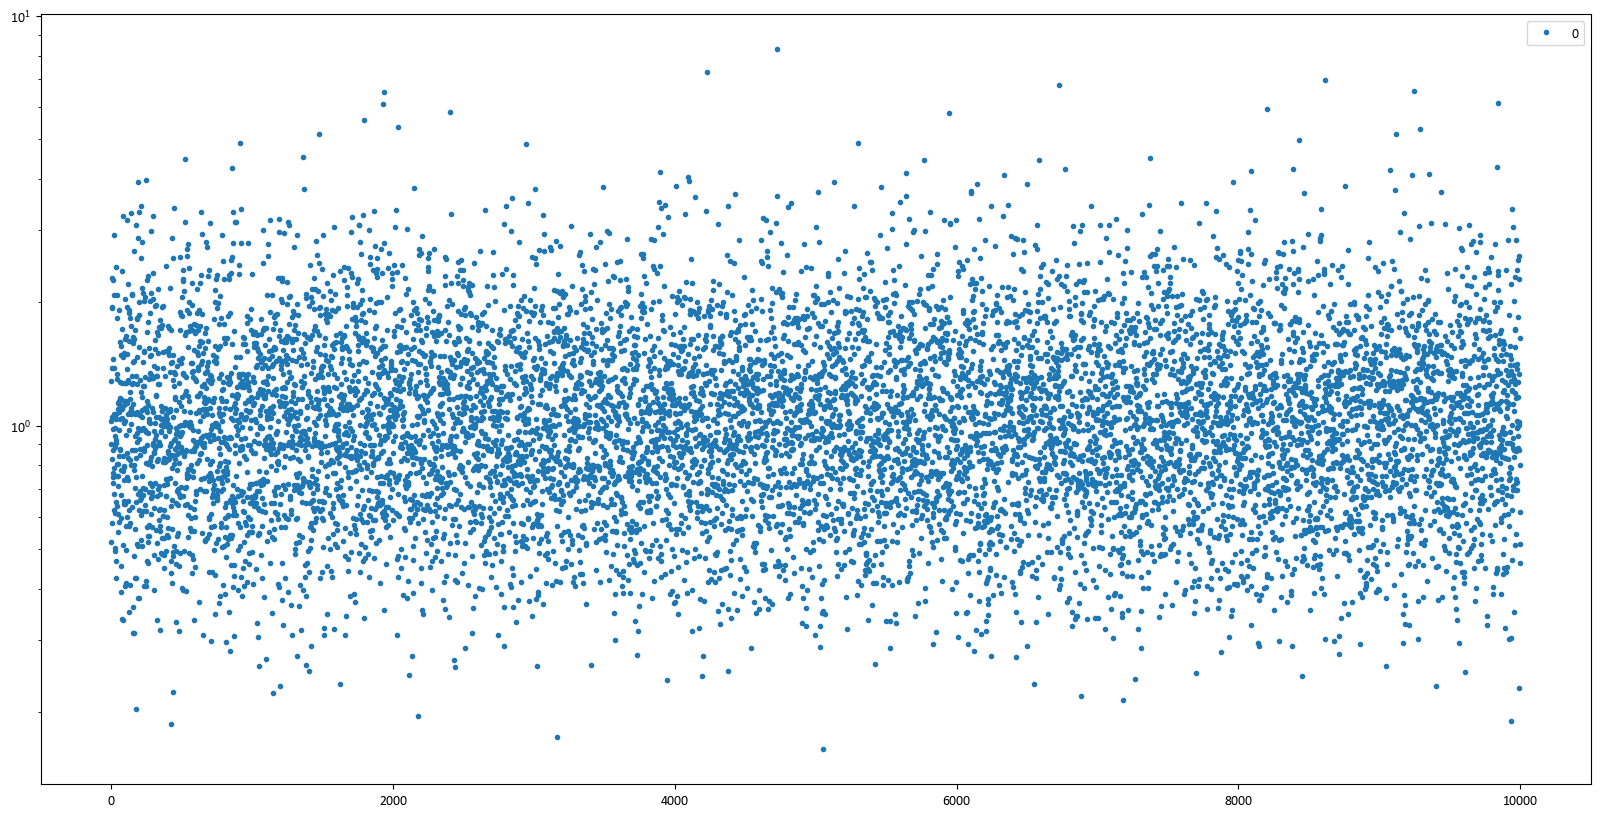

In [91]:
x = [np.e ** (np.random.normal(scale=.5)) for i in range(10000)]
x = pd.DataFrame(x)
fig, ax = plt.subplots(figsize = (20,10))
x.plot.line(ax = ax, ls = "", marker = ".", logy = True)

In [180]:
attr = "real_income_per_capital"
log = False

fig, ax = plt.subplots(figsize=(10, 5))

if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()
for j, breed in enumerate(data_by_breeds.keys()): 
        
    attr_df = np.log(data_by_breeds[breed][attr].diff())
    cumrt = data_by_breeds[breed]['population']
    plt.scatter(y= attr_df.mean(axis=1), x = cumrt.mean(axis=1),s=.25, alpha = .5, color="C"+str(j), label=breed)
    #sb.lineplot(y= data_by_breeds[breed][attr].diff().rolling(window=100).mean(), x = cumrt, lw=0.1, alpha=.25, palette=["C" + str(i)]*runs, label=None, legend=False, ax=ax)
    #break_data = pd.DataFrame()
    #break_data["dwealth_per_capita"] = np.log(data_by_breeds[breed][attr].diff()).mean(axis=1)
    #break_data["population"] = data_by_breeds[breed]['population'].mean(axis=1)
    #break_data = break_data.dropna()
    #break_data = break_data.sort_values(by="population")
    #break_data = break_data.replace([float("inf"), float("-inf")], np.NaN).fillna(method="ffill")
    #test = tsa.zivot_andrews(break_data["dwealth_per_capita"])
    
    # test for significance of break
    #if test[1] < 0.05: 
     #   break_population = int(break_data["population"].loc[test[4]])
     #   ax.axvline(x=break_population, label = breed + " structural break", ls = "--", color = "C"+str(j))

       # b, m = np.polyfit(break_data["population"][break_population:], break_data["dwealth_per_capita"][break_population:], deg=1)
       # x = np.linspace(break_population, 425, 1000)
       # ax.plot(x, np.log(b - m * x), color = "C"+str(j), ls='--' )

    #for run in range(runs):
      #  sb.lineplot(y=attr_df[run].rolling(window=100).mean(), x=cumrt[run], alpha=0.25, color=f"C{j}", palette=[f"C{j}"] * runs, lw=0.1, ax=ax)
    #(data_by_breeds["basic"]["wealth_per_capita"].diff().mean(axis=1).rolling(window=1000).mean()).plot(legend=False, ax=ax)


ax.set_xlabel("Population")
ax.set_ylabel(f"Logged Difference of {attr_string}")

ax.set_xlim(xmin=0, xmax=450)
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Period")
else: 
    ax.set_title(f"Mean Logged Differences of {attr_string} by Mean Population")
#ax.set_xscale("log")
ax.legend(markerscale=10)

% change in Marginal Savings ^^^^

In [50]:
attr = "real_income_per_capital"
log = False

fig, ax = plt.subplots(figsize=(10, 5))

if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()
for j, breed in enumerate(data_by_breeds.keys()): 
        
    attr_df = np.log(data_by_breeds[breed][attr].diff())
    cumrt = data_by_breeds[breed]['population']
    plt.scatter(y= attr_df.mean(axis=1), x = cumrt.mean(axis=1),s=.25, alpha = .5, color="C"+str(j), label=breed)


ax.set_xlabel("Population")
ax.set_ylabel(f"Logged Difference of {attr_string}")

ax.set_xlim(xmin=0, xmax=450)
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Period")
else: 
    ax.set_title(f"Mean Logged Differences of {attr_string} by Mean Population")
    
ax.axhlines(0)
#ax.set_xscale("log")
ax.legend(markerscale=10)

AttributeError: 'AxesSubplot' object has no attribute 'axhlines'

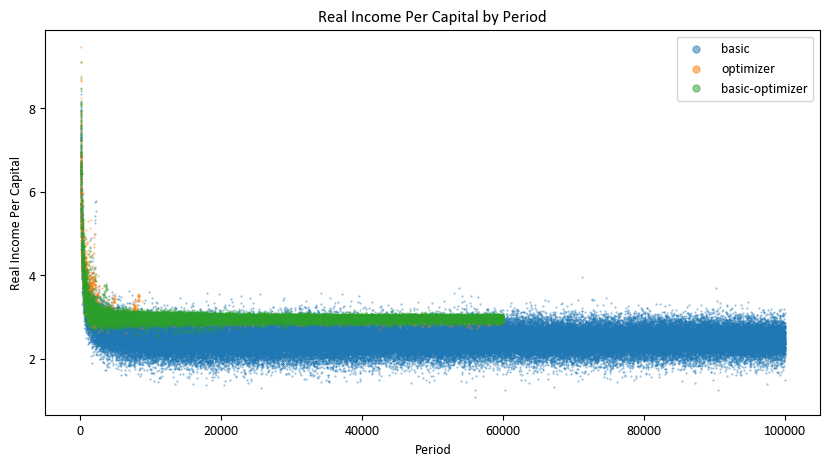

In [14]:
attr = "real_income_per_capital"
log = False

fig, ax = plt.subplots(figsize=(10, 5))

if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()
for j, breed in enumerate(data_by_breeds.keys()): 
        
    attr_df = data_by_breeds[breed][attr][50:]
    pop = data_by_breeds[breed]['population'][50:]
    plt.scatter(y= attr_df.mean(axis=1), x = data_by_breeds[breed][attr][50:].index,s=.25, alpha = .5, color="C"+str(j), label=breed)
   

ax.set_xlabel("Period")
ax.set_ylabel(f"{attr_string}")

#ax.set_xlim(xmin=0, xmax=425)
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Period")
else: 
    ax.set_title(f"{attr_string} by Period")
#ax.set_xscale("log")
ax.legend(markerscale=10)

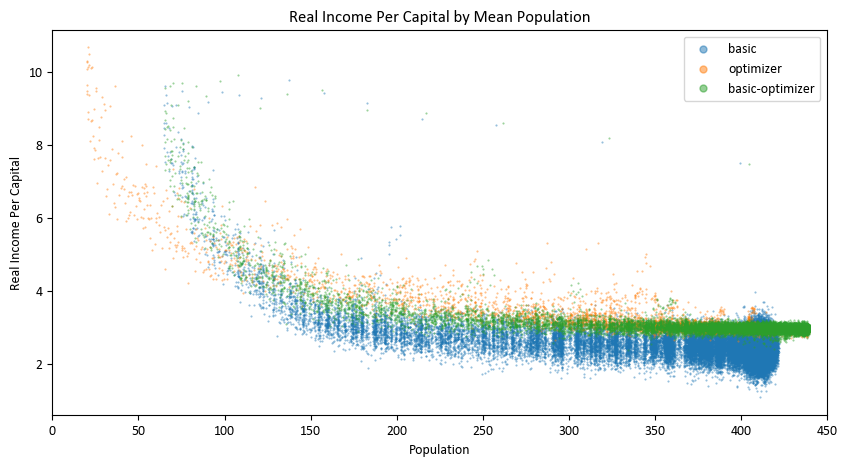

In [48]:
attr = "real_income_per_capital"
log = False

fig, ax = plt.subplots(figsize=(10, 5))

if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()
for j, breed in enumerate(data_by_breeds.keys()): 
        
    attr_df = data_by_breeds[breed][attr]
    pop = data_by_breeds[breed]['population']
    plt.scatter(y= attr_df.mean(axis=1), x = pop.mean(axis=1),s=.25, alpha = .5, color="C"+str(j), label=breed)
   

ax.set_xlabel("Population")
ax.set_ylabel(f"{attr_string}")

ax.set_xlim(xmin=0, xmax=450)
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Period")
else: 
    ax.set_title(f"{attr_string} by Mean Population")
#ax.set_xscale("log")
ax.legend(markerscale=10)

average productivity of k^^^^

plot lin fit line from 200 on

In [69]:
import scipy.stats as stats

In [39]:
basic_mutatable_vars = ["mutate_rate", "price_change", "reproduction_criteria", "reservation_ratio", "reproduction_ratio"]

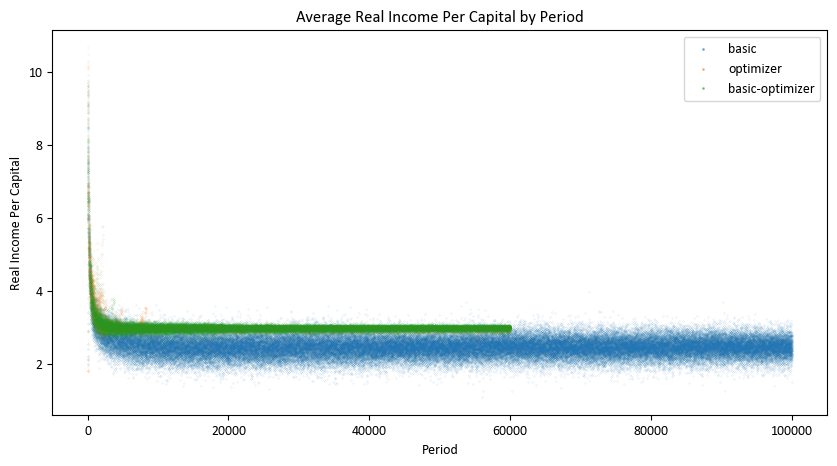

In [34]:
attr = "real_income_per_capital"

log = False

fig, ax = plt.subplots(figsize=(10, 5))

if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()

for i, breed in enumerate(data_by_breeds.keys()): 

    plt.scatter( data_by_breeds[breed][attr].mean(axis=1).index, data_by_breeds[breed][attr].mean(axis=1), s=.01, alpha = .5, color="C"+str(i), label=breed)
    #plt.scatter([data_by_breeds[breed][attr].index]*30, data_by_breeds[breed][attr].T, alpha = .05, s=.01, color="C"+str(i), label=None)        
    
ax.set_xlabel("Period")
ax.set_ylabel(f"{attr_string}")
if log: 
    #ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Period")
else: 
    ax.set_title(f"Average {attr_string} by Period")
#ax.axhline(1, c="k", ls="--")
#ax.set_ylim(ymin=0.8, ymax=1.2)
ax.legend(markerscale=10, loc="upper right")

ValueError: x and y must be the same size

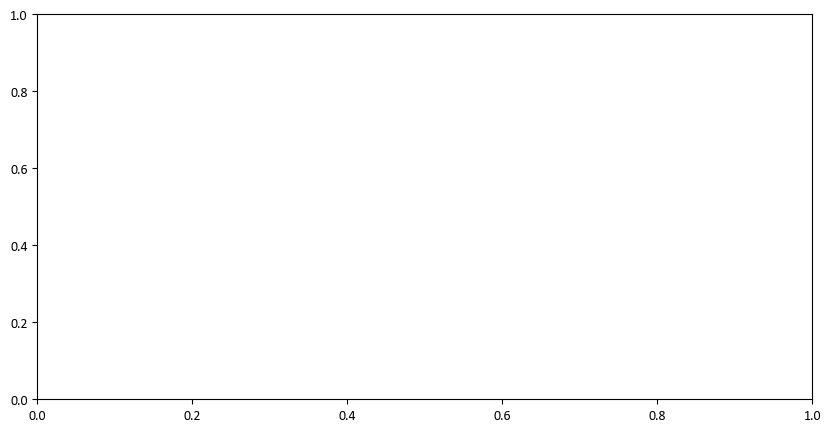

In [17]:
attr = "runtime"

log = False

fig, ax = plt.subplots(figsize=(10, 5))

if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()

for i, breed in enumerate(data_by_breeds.keys()): 

    plt.scatter(x=range(len(data_by_breeds[breed][attr][100:])), y=data_by_breeds[breed][attr][100:], s=.25, alpha = 1, color="C"+str(i), label=breed)
    #sb.lineplot(data= data_by_breeds[breed][attr][100:], lw=0.25, alpha=.25, palette=["C" + str(i)]*runs, label=None, legend=False, ax=ax)
        
   # break_data = pd.DataFrame()
   # break_data[ attr] = data_by_breeds[breed][attr].mean(axis=1)
   # break_data["period"] = range(len(data_by_breeds[breed][attr]))
    #break_data = break_data.dropna()
    #break_data = break_data.replace([float("inf"), float("-inf")], np.NaN).fillna(method="ffill")
    #test = tsa.zivot_andrews(break_data[attr])
    #break_population = int(break_data["period"].loc[test[4]])
   # ax.axvline(x=break_population, label = breed + " structural break", ls = "--", color = "C"+str(i))
   # result = sm.OLS(np.log(break_data[attr].iloc[break_population:]), sm.add_constant(np.log(break_data["period"].iloc[break_population:]))).fit()
   # print(breed)
    #print(result.summary())
    
    
ax.set_xlabel("Period")
ax.set_ylabel(f"{attr_string}")
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Period")
else: 
    ax.set_title(f"Average {attr_string} by Period")

ax.legend()

In [ ]:
attr = "total_avg_price"

log = True

fig, ax = plt.subplots(figsize=(10, 5))

for j, breed in enumerate(data_by_breeds.keys()):

    te = np.cumsum(data_by_breeds[breed]["runtime"])[100:]
    attr_df = data_by_breeds[breed][attr][100:]

   # for run in range(runs):
     #   sb.lineplot(y=attr_df[run], x=te[run], alpha=0.25, color=f"C{j}", palette=[f"C{j}"] * runs, lw=0.5, ax=ax)
#
    plt.scatter(x=te.mean(axis=1), s=.1, alpha=.5, y=attr_df.mean(axis=1), color=f"C{j}", label=breed)
    
    
if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()

ax.set_ylabel(f"{attr_string}")
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Cumulative Runtime")
    ax.set_xlabel("Log Cumulative Runtime")

else: 
    ax.set_title(f"{attr_string} by Cumulative Runtime")
    ax.set_xlabel("Cumulative Runtime")
ax.set_xlim(xmin=-50, xmax=1500)
plt.tight_layout()
plt.show()

In [ ]:
attr = "total_avg_price"

log = True

fig, ax = plt.subplots(figsize=(10, 5))

for j, breed in enumerate(data_by_breeds.keys()):

    te = data_by_breeds[breed]["total_exchanges"][100:]
    attr_df = data_by_breeds[breed][attr][100:]

    #for run in range(runs):
      #  sb.lineplot(y=attr_df[run], x=te[run], alpha=0.25, color=f"C{j}", palette=[f"C{j}"] * runs, lw=0.5, ax=ax)

    sb.lineplot(x=te.mean(axis=1), lw=.5, alpha=.5, y=attr_df.mean(axis=1), color=f"C{j}", label=breed, ax=ax)
    #break_data = pd.DataFrame()
    #break_data[attr] = data_by_breeds[breed][attr][100:].mean(axis=1)
    #break_data["te"] = data_by_breeds[breed]['total_exchanges'][100:].mean(axis=1)
    #break_data = break_data.dropna()
    #break_data = break_data.sort_values(by="te")
    #break_data = break_data.replace([float("inf"), float("-inf")], np.NaN).fillna(method="ffill")
    #test = tsa.zivot_andrews(break_data[attr])
    #break_population = int(break_data["te"].iloc[test[4]])
    #ax.axvline(x=break_population, label = breed + " structural break", ls = "--", color = "C"+str(j))
    #result = sm.OLS(np.log(break_data[attr].iloc[test[4]:]), sm.add_constant(np.log(break_data["te"].iloc[test[4]:]))).fit()
    #print(breed)
    #print(result.summary())
    
if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()

ax.set_ylabel(f"{attr_string}")
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Total Exchanges")
    ax.set_xlabel("Log Total Exchanges")

else: 
    ax.set_title(f"{attr_string} by Cumulative Runtime")
    ax.set_xlabel("Cumulative Runtime")


plt.tight_layout()
plt.show()

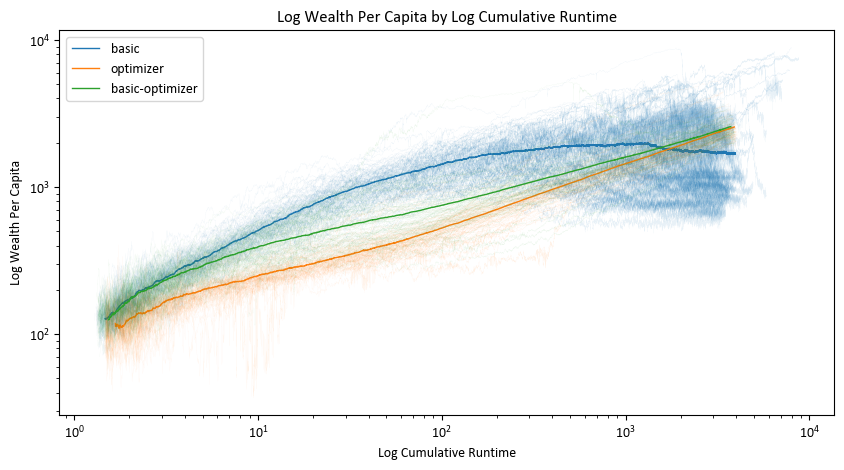

In [46]:
attr = "wealth_per_capita"

log = True

fig, ax = plt.subplots(figsize=(10, 5))

for j, breed in enumerate(data_by_breeds.keys()):
  
    te = np.cumsum(data_by_breeds[breed]["runtime"])[50:]
    attr_df = data_by_breeds[breed][attr][50:]

    for run in range(runs):
        sb.lineplot(y=attr_df[run], x=te[run], alpha=0.1, color=f"C{j}", lw=0.1, ax=ax)

    sb.lineplot(x=te.mean(axis=1), lw=1, y=attr_df.mean(axis=1), color=f"C{j}", label=breed, ax=ax)
if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()

ax.set_ylabel(f"{attr_string}")
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Cumulative Runtime")
    ax.set_xlabel("Log Cumulative Runtime")

else: 
    ax.set_title(f"{attr_string} by Cumulative Runtime")
    ax.set_xlabel("Cumulative Runtime")

ax.legend()


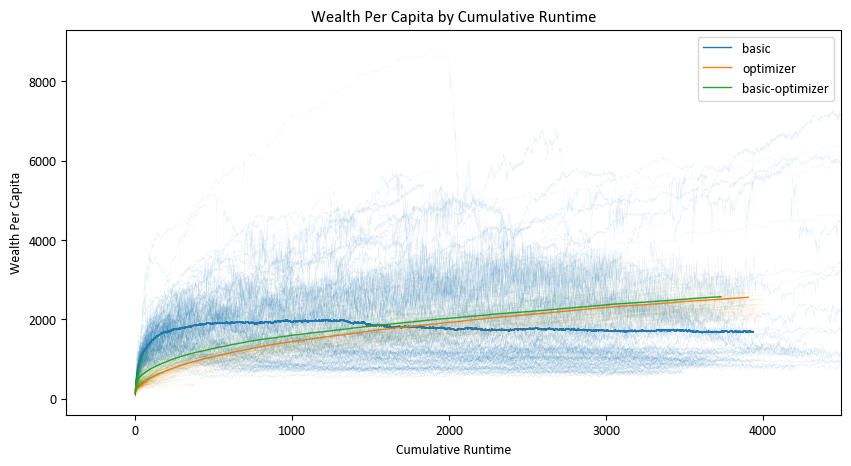

In [47]:
attr = "wealth_per_capita"

log = False

fig, ax = plt.subplots(figsize=(10, 5))

for j, breed in enumerate(data_by_breeds.keys()):
  
    te = np.cumsum(data_by_breeds[breed]["runtime"])[50:]
    attr_df = data_by_breeds[breed][attr][50:]

    for run in range(runs):
        sb.lineplot(y=attr_df[run], x=te[run], alpha=0.1, color=f"C{j}", lw=0.1, ax=ax)

    sb.lineplot(x=te.mean(axis=1), lw=1, y=attr_df.mean(axis=1), color=f"C{j}", label=breed, ax=ax)
if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()

ax.set_ylabel(f"{attr_string}")
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Cumulative Runtime")
    ax.set_xlabel("Log Cumulative Runtime")

else: 
    ax.set_title(f"{attr_string} by Cumulative Runtime")
    ax.set_xlabel("Cumulative Runtime")
#ax.set_ylim(ymax=4500, ymin=-1000)
ax.set_xlim(xmax=4500)
ax.legend()


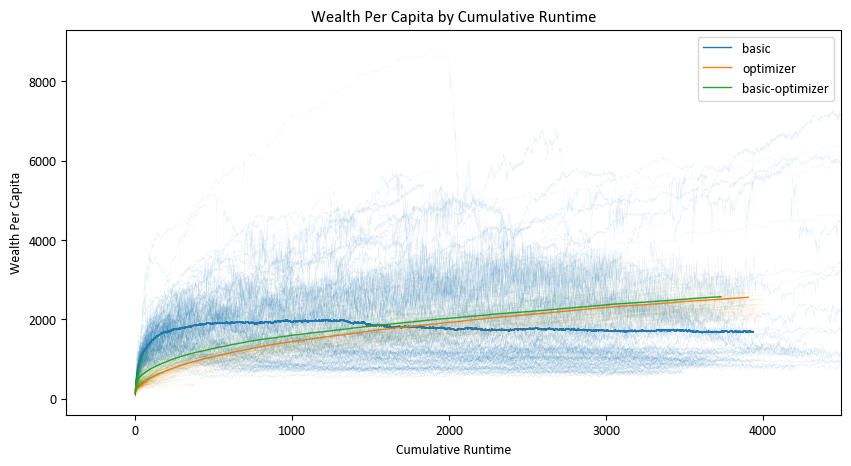

In [48]:
ax.set_xlim(xmax=4500)
ax
ax.figure

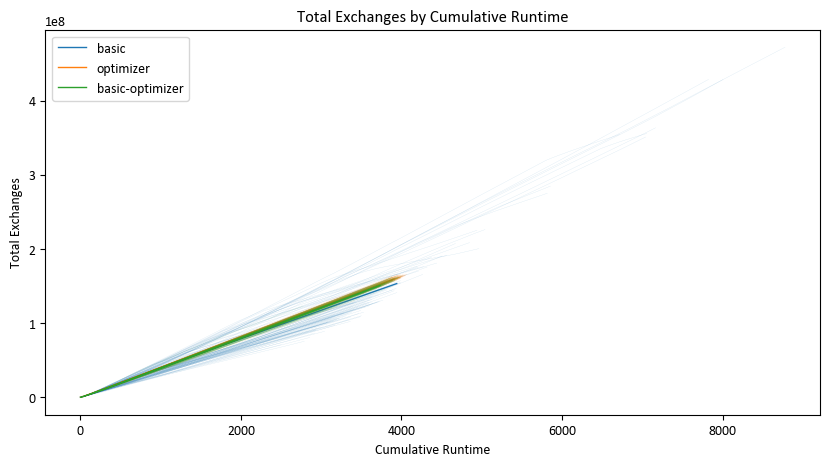

In [25]:
attr = "total_exchanges"

log = False

fig, ax = plt.subplots(figsize=(10, 5))

for j, breed in enumerate(data_by_breeds.keys()):
  
    te = np.cumsum(data_by_breeds[breed]["runtime"])[50:]
    attr_df = data_by_breeds[breed][attr][50:]

    for run in range(runs):
        sb.lineplot(y=attr_df[run], x=te[run], alpha=0.2, color=f"C{j}", lw=0.2, ax=ax)

    sb.lineplot(x=te.mean(axis=1), lw=1, y=attr_df.mean(axis=1), color=f"C{j}", label=breed, ax=ax)
if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()

ax.set_ylabel(f"{attr_string}")
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Cumulative Runtime")
    ax.set_xlabel("Log Cumulative Runtime")

else: 
    ax.set_title(f"{attr_string} by Cumulative Runtime")
    ax.set_xlabel("Cumulative Runtime")

ax.legend()


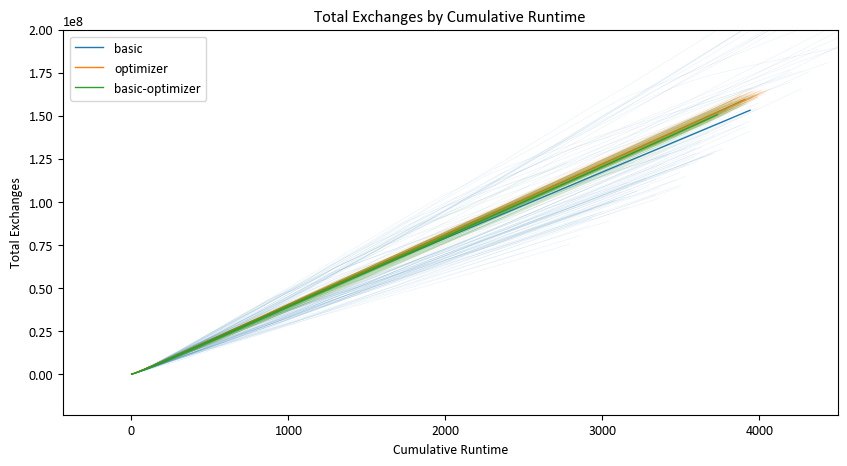

In [26]:
ax.set_xlim(xmax=4500)
ax.set_ylim(ymax=200000000)
ax.figure

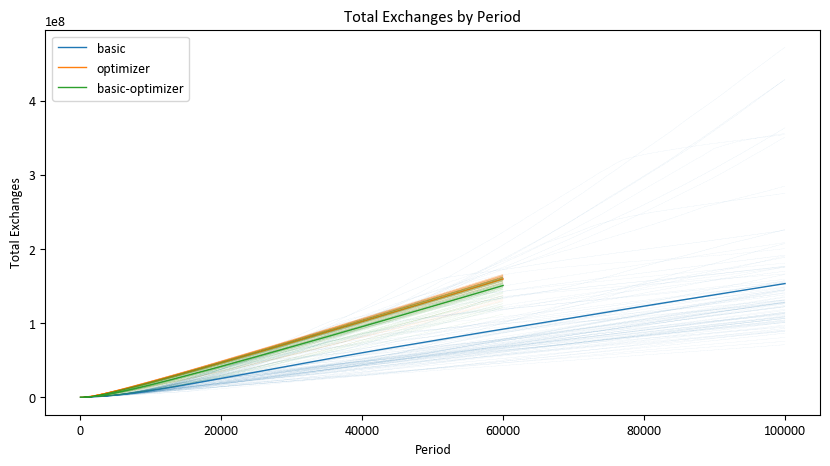

In [41]:
attr = "total_exchanges"

log = False

fig, ax = plt.subplots(figsize=(10, 5))

if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()

for i, breed in enumerate(data_by_breeds.keys()): 
    
    plot_df = data_by_breeds[breed][attr][50:]
   
    sb.lineplot(data= plot_df.mean(axis=1),lw=1, alpha = 1, color="C"+str(i), label=breed, ax=ax)
    sb.lineplot(data = plot_df, lw=0.2, alpha=.2, palette = ["C"+str(i)]*runs, legend=False, ax=ax)
    
ax.set_xlabel("Period")
ax.set_ylabel(f"{attr_string}")
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Period")
else: 
    ax.set_title(f"{attr_string} by Period")

ax.legend()

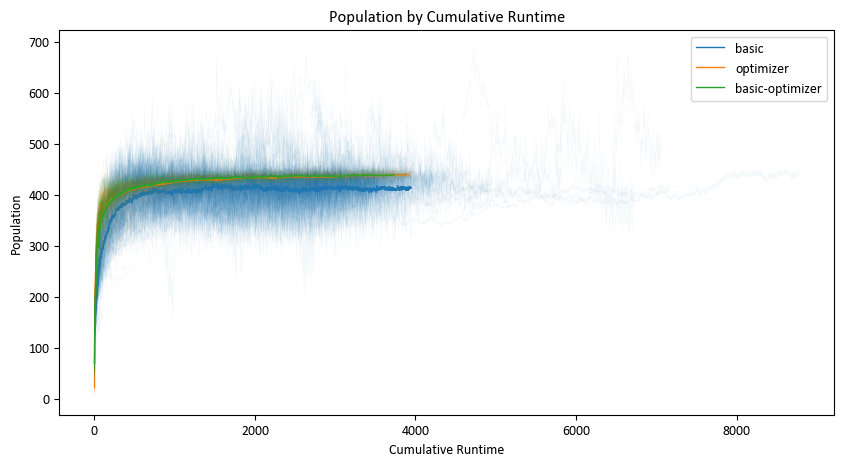

In [27]:
attr = "population"

log = False

fig, ax = plt.subplots(figsize=(10, 5))

for j, breed in enumerate(data_by_breeds.keys()):
  
    te = np.cumsum(data_by_breeds[breed]["runtime"])[50:]
    attr_df = data_by_breeds[breed][attr][50:]

    for run in range(runs):
        sb.lineplot(y=attr_df[run], x=te[run], alpha=0.05, color=f"C{j}", lw=0.1, ax=ax)

    sb.lineplot(x=te.mean(axis=1), lw=1, y=attr_df.mean(axis=1), color=f"C{j}", label=breed, ax=ax)
if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()

ax.set_ylabel(f"{attr_string}")
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Cumulative Runtime")
    ax.set_xlabel("Log Cumulative Runtime")

else: 
    ax.set_title(f"{attr_string} by Cumulative Runtime")
    ax.set_xlabel("Cumulative Runtime")

ax.legend()


In [28]:
ax.set_xlim(xmax=4500)
ax.figure

In [43]:
attr = "population"

log = True

fig, ax = plt.subplots(figsize=(10, 5))

for j, breed in enumerate(data_by_breeds.keys()):
  
    te = np.cumsum(data_by_breeds[breed]["runtime"])[50:]
    attr_df = data_by_breeds[breed][attr][50:]

    for run in range(runs):
        sb.lineplot(y=attr_df[run], x=te[run], alpha=0.1, color=f"C{j}", lw=0.1, ax=ax)

    sb.lineplot(x=te.mean(axis=1), lw=1, y=attr_df.mean(axis=1), color=f"C{j}", label=breed, ax=ax)
if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()

ax.set_ylabel(f"{attr_string}")
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Cumulative Runtime")
    ax.set_xlabel("Log Cumulative Runtime")

else: 
    ax.set_title(f"{attr_string} by Cumulative Runtime")
    ax.set_xlabel("Cumulative Runtime")

ax.legend()


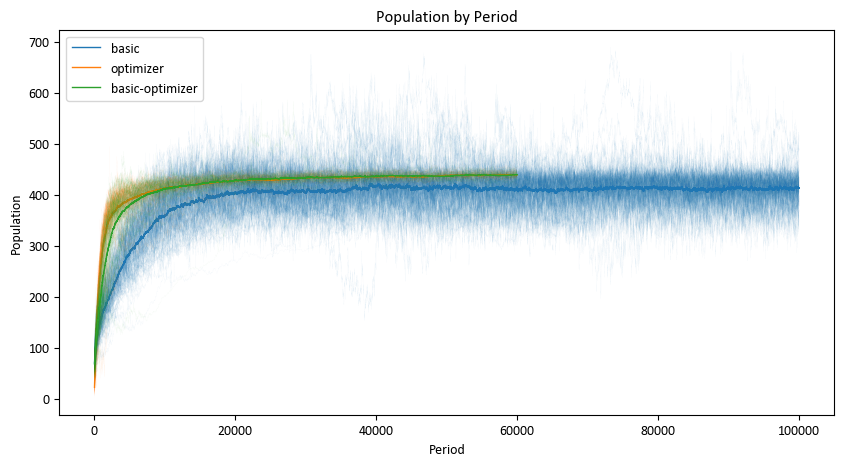

In [42]:
attr = "population"

log = False

fig, ax = plt.subplots(figsize=(10, 5))

if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()

for i, breed in enumerate(data_by_breeds.keys()): 
    
    plot_df = data_by_breeds[breed][attr][50:]
   
    sb.lineplot(data= plot_df.mean(axis=1),lw=1, alpha = 1, color="C"+str(i), label=breed, ax=ax)
    sb.lineplot(data = plot_df, lw=0.1, alpha=.1, palette = ["C"+str(i)]*runs, legend=False, ax=ax)
    
ax.set_xlabel("Period")
ax.set_ylabel(f"{attr_string}")
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Period")
else: 
    ax.set_title(f"{attr_string} by Period")

ax.legend()

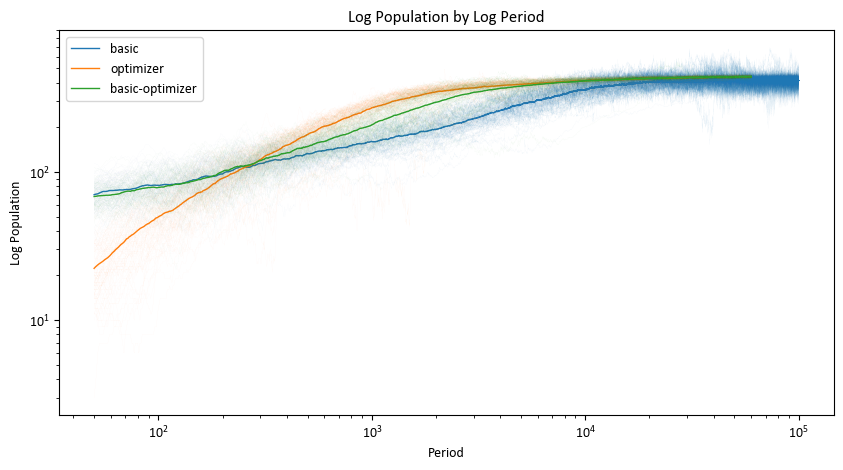

In [35]:
attr = "population"

log = True

fig, ax = plt.subplots(figsize=(10, 5))

if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()

for i, breed in enumerate(data_by_breeds.keys()): 
    
    plot_df = data_by_breeds[breed][attr][50:]
   
    sb.lineplot(data= plot_df.mean(axis=1),lw=1, alpha = 1, color="C"+str(i), label=breed, ax=ax)
    sb.lineplot(data = plot_df, lw=0.1, alpha=.1, palette = ["C"+str(i)]*runs, legend=False, ax=ax)
    
ax.set_xlabel("Period")
ax.set_ylabel(f"{attr_string}")
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Period")
else: 
    ax.set_title(f"{attr_string} by Period")

ax.legend()

In [33]:
attr = "num_herders"

log = False

fig, ax = plt.subplots(figsize=(10, 5))

if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()

for i, breed in enumerate(["basic"]): 
    
    plot_df = data_by_breeds[breed][attr][50:]
   
    sb.lineplot(data= plot_df.mean(axis=1),lw=2, alpha = 1, color="C"+str(i), label=breed, ax=ax)
    #sb.lineplot(data = np.cumsum(plot_df), lw=0.1, alpha=.05, palette = ["C"+str(i)]*runs, legend=False, ax=ax)
    
ax.set_xlabel("Period")
ax.set_ylabel(f"{attr_string}")
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Period")
else: 
    ax.set_title(f"{attr_string} by Period")
ax.legend()

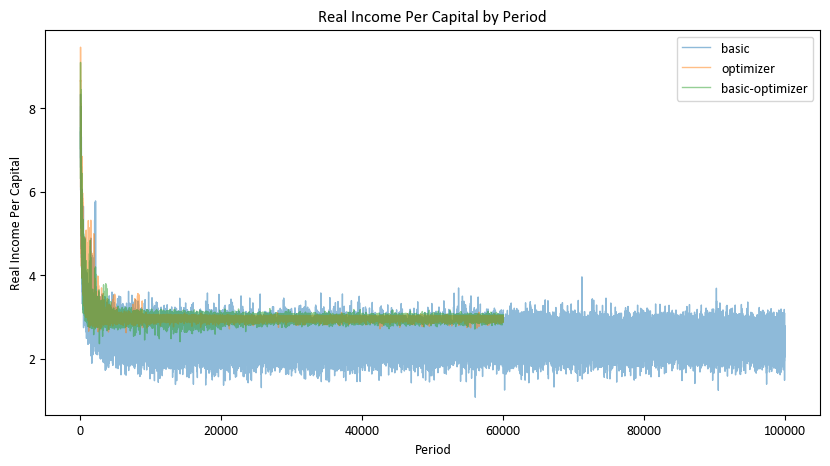

In [24]:
attr = "real_income_per_capital"

log = False

fig, ax = plt.subplots(figsize=(10, 5))

if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()

for i, breed in enumerate(data_by_breeds.keys()): 
    
    plot_df = data_by_breeds[breed][attr][50:]
   
    sb.lineplot(data= plot_df.mean(axis=1),lw=1, alpha = 0.5, color="C"+str(i), label=breed, ax=ax)
    #sb.lineplot(data = plot_df, lw=0.1, alpha=.05, palette = ["C"+str(i)]*runs, legend=False, ax=ax)
    
ax.set_xlabel("Period")
ax.set_ylabel(f"{attr_string}")
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Period")
else: 
    ax.set_title(f"{attr_string} by Period")

ax.legend()

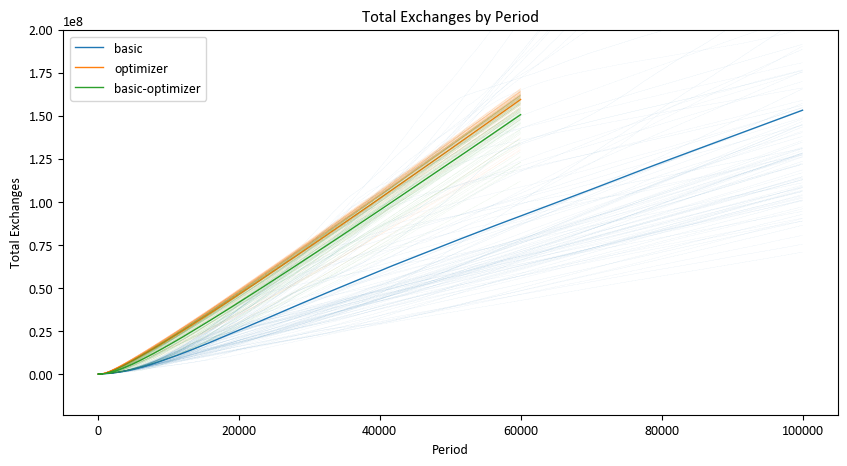

In [40]:
attr = "total_exchanges"

log = False

fig, ax = plt.subplots(figsize=(10, 5))

if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()

for i, breed in enumerate(data_by_breeds.keys()): 
    
    plot_df = data_by_breeds[breed][attr][50:]
   
    sb.lineplot(data= plot_df.mean(axis=1),lw=1, alpha = 1, color="C"+str(i), label=breed, ax=ax)
    sb.lineplot(data = plot_df, lw=0.2, alpha=.2, palette = ["C"+str(i)]*runs, legend=False, ax=ax)
    
ax.set_xlabel("Period")
ax.set_ylabel(f"{attr_string}")
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Period")
else: 
    ax.set_title(f"{attr_string} by Period")
ax.set_ylim(ymax=200000000)
ax.legend()

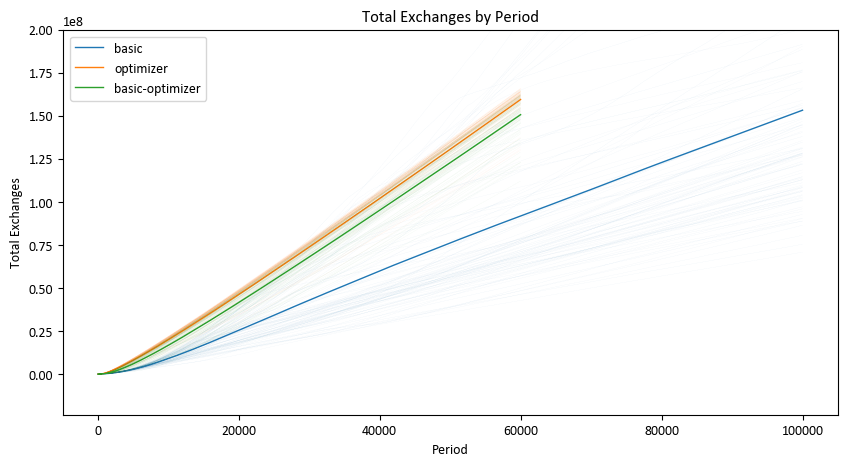

In [39]:
ax.set_ylim(ymax=200000000)
ax.figure

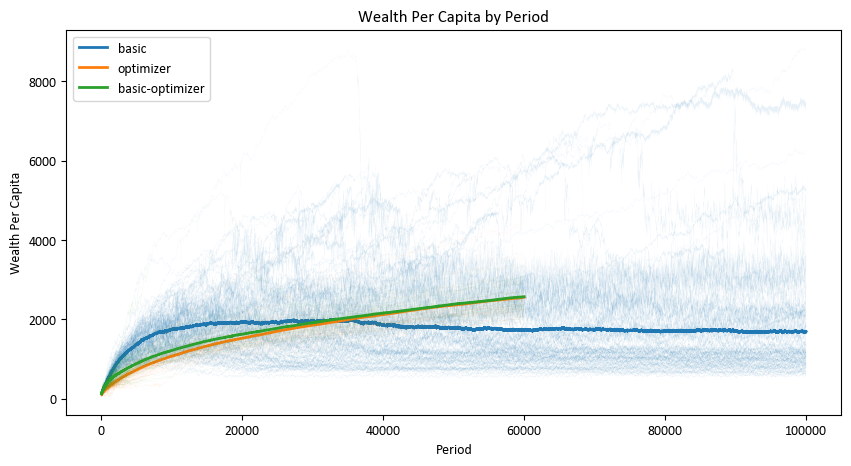

In [26]:
attr = "wealth_per_capita"

log = False

fig, ax = plt.subplots(figsize=(10, 5))

if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()

for i, breed in enumerate(data_by_breeds.keys()): 
    
    plot_df = data_by_breeds[breed][attr][50:]
   
    sb.lineplot(data= plot_df.mean(axis=1),lw=1, alpha = 1, color="C"+str(i), label=breed, ax=ax)
    sb.lineplot(data = plot_df, lw=0.1, alpha=.1, palette = ["C"+str(i)]*runs, legend=False, ax=ax)
    
ax.set_xlabel("Period")
ax.set_ylabel(f"{attr_string}")
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Period")
else: 
    ax.set_title(f"{attr_string} by Period")
#ax.set_ylim(ymax=4500)
ax.legend()

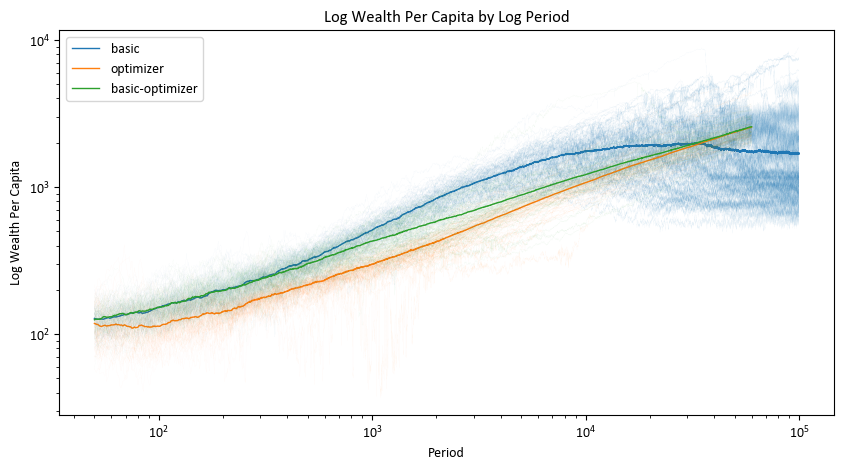

In [49]:
attr = "wealth_per_capita"

log = True

fig, ax = plt.subplots(figsize=(10, 5))

if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()

for i, breed in enumerate(data_by_breeds.keys()): 
    
    plot_df = data_by_breeds[breed][attr][50:]
   
    sb.lineplot(data= plot_df.mean(axis=1),lw=1, alpha = 1, color="C"+str(i), label=breed, ax=ax)
    sb.lineplot(data = plot_df, lw=0.1, alpha=.1, palette = ["C"+str(i)]*runs, legend=False, ax=ax)
    
ax.set_xlabel("Period")
ax.set_ylabel(f"{attr_string}")
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Period")
else: 
    ax.set_title(f"{attr_string} by Period")
#ax.set_ylim(ymax=4500)
ax.legend()

In [1086]:

min_res_ratio = 0.5
max_res_ratio = 2
                    
reservation_ratio = [np.exp(np.log(min_res_ratio) + random.random() * (np.log(max_res_ratio) - np.log(min_res_ratio))) for i in range(2000)]

(array([395., 274., 244., 230., 178., 157., 152., 134., 135., 101.]),
 array([0.5000843 , 0.65006051, 0.80003671, 0.95001292, 1.09998912,
        1.24996533, 1.39994154, 1.54991774, 1.69989395, 1.84987015,
        1.99984636]),
 <BarContainer object of 10 artists>)

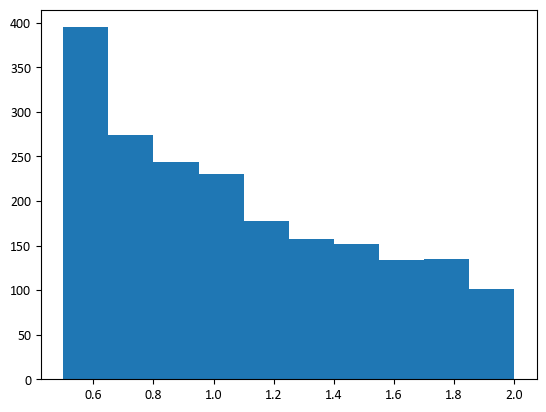

In [1087]:
plt.hist(reservation_ratio)

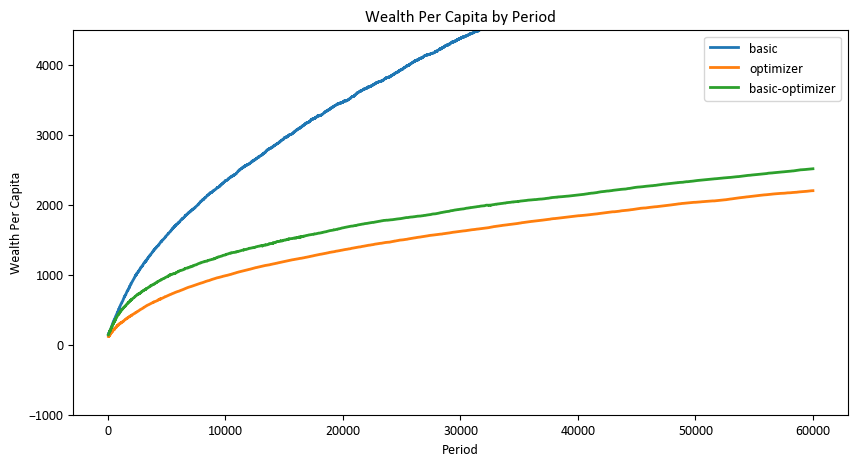

In [27]:
ax.set_ylim(ymin=-1000, ymax=4500)
ax.figure

In [ ]:
attr = "population"

log = True

fig, ax = plt.subplots(figsize=(10, 5))

for j, breed in enumerate(data_by_breeds.keys()):
  
    te = np.cumsum(data_by_breeds[breed]["runtime"])[50:]
    attr_df = data_by_breeds[breed][attr][50:]

    for run in range(runs):
        sb.lineplot(y=attr_df[run], x=te[run], alpha=0.1, color=f"C{j}", lw=0.05, ax=ax)

    sb.lineplot(x=te.mean(axis=1), lw=1, y=attr_df.mean(axis=1), color=f"C{j}", label=breed, ax=ax)
if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()

ax.set_ylabel(f"{attr_string}")
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Cumulative Runtime")
    ax.set_xlabel("Log Cumulative Runtime")

else: 
    ax.set_title(f"{attr_string} by Cumulative Runtime")
    ax.set_xlabel("Cumulative Runtime")

ax.legend()


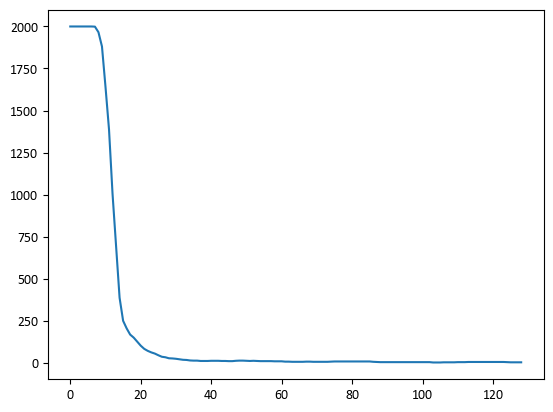

In [1061]:
plt.plot(data_by_breeds["optimizer"]["population"][4])

In [1054]:
data_by_breeds["optimizer"]["population"].iloc[49999]

0     434.0
1     441.0
2     439.0
3     433.0
4       NaN
      ...  
95    435.0
96    429.0
97    436.0
98    446.0
99    431.0
Name: 49999, Length: 100, dtype: float32

In [1066]:
stats.ttest_ind(data_by_breeds["basic"]["population"].iloc[49999], data_by_breeds["optimizer"]["population"].iloc[49999].dropna())

Ttest_indResult(statistic=-7.264322111541744, pvalue=8.532437894452024e-12)

In [1068]:
np.log(data_by_breeds["basic"]["population"].iloc[49999]).mean() / np.log(data_by_breeds["optimizer"]["population"].iloc[49999]).mean()

0.9889870863561709

In [51]:
plot_df

0      1      2      3      4      5      6      7      8      9   \
50      50.0   46.0   48.0   60.0   71.0   45.0   77.0   43.0   62.0   64.0   
51      51.0   48.0   48.0   62.0   72.0   44.0   78.0   45.0   62.0   65.0   
52      53.0   49.0   49.0   62.0   73.0   42.0   78.0   46.0   62.0   65.0   
53      54.0   50.0   49.0   60.0   74.0   42.0   77.0   48.0   65.0   64.0   
54      55.0   50.0   50.0   61.0   74.0   41.0   75.0   52.0   69.0   62.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
39995  405.0  379.0  402.0  399.0  350.0  458.0  374.0  411.0  383.0  388.0   
39996  405.0  380.0  401.0  400.0  350.0  461.0  372.0  412.0  383.0  380.0   
39997  405.0  380.0  401.0  401.0  346.0  466.0  372.0  413.0  385.0  380.0   
39998  405.0  380.0  401.0  402.0  347.0  470.0  370.0  413.0  386.0  381.0   
39999  404.0  380.0  402.0  404.0  353.0  472.0  371.0  411.0  386.0  381.0   

       ...     20     21     22     23     24     25     26     27     28  \
50     ...   47.0   53.0   61.0   55.0   63.0   58.0   61.0   40.0   33.0   
51     ...   45.0   55.0   61.0   57.0   66.0   60.0   63.0   39.0   33.0   
52     ...   45.0   54.0   60.0   58.0   64.0   64.0   63.0   36.0   36.0   
53     ...   46.0   53.0   61.0   59.0   66.0   62.0   63.0   35.0   36.0   
54     ...   45.0   56.0   59.0   59.0   64.0   64.0   64.0   35.0   35.0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
39995  ...  371.0  427.0  385.0  373.0  447.0  430.0  407.0  386.0  370.0   
39996  ...  374.0  428.0  386.0  375.0  449.0  428.0  406.0  385.0  370.0   
39997  ...  379.0  426.0  387.0  376.0  453.0  428.0  405.0  385.0  364.0   
39998  ...  380.0  425.0  386.0  376.0  458.0  427.0  407.0  383.0  363.0   
39999  ...  385.0  427.0  387.0  380.0  457.0  426.0  406.0  384.0  360.0   

          29  
50      67.0  
51      67.0  
52      70.0  
53      69.0  
54      64.0  
...      ...  
39995  461.0  
39996  459.0  
39997  453.0  
39998  452.0  
39999  451.0  

[39950 rows x 30 columns]

In [ ]:
attr = "total_exchanges"

log = False

fig, ax = plt.subplots(figsize=(10, 5))

if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()

for i, breed in enumerate(data_by_breeds.keys()): 
    
    plot_df = data_by_breeds[breed][attr][50:]
   
    sb.lineplot(data= plot_df.mean(axis=1),lw=2, alpha = 1, color="C"+str(i), label=breed, ax=ax)
    sb.lineplot(data = plot_df, lw=0.25, alpha=.4, palette = ["C"+str(i)]*runs, label=None, legend=False, ax=ax)
    
ax.set_xlabel("Period")
ax.set_ylabel(f"{attr_string}")
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} by Log Period")
else: 
    ax.set_title(f"{attr_string} by Period")

ax.legend()

<AxesSubplot:>

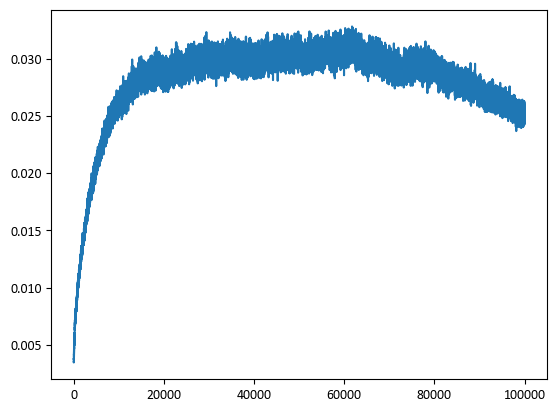

In [127]:
plot_df.mean(axis=1).plot(x=range(len(plot_df)), y=plot_df.mean(axis=1))

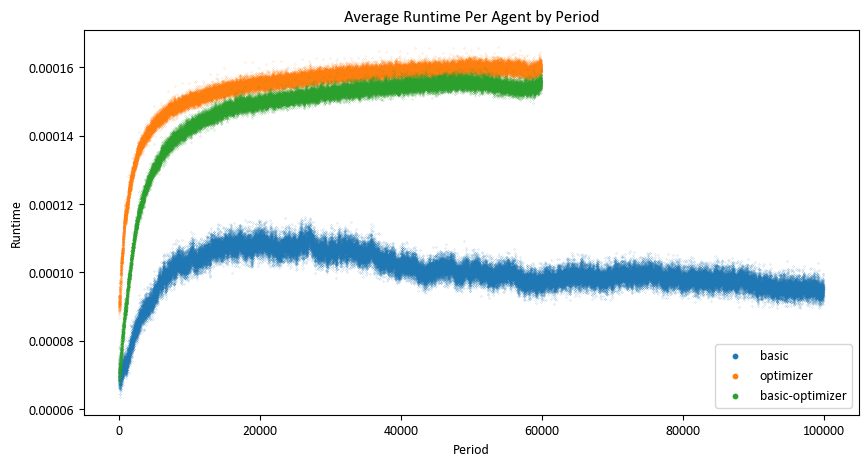

In [9]:
attr = "runtime"

log = False

fig, ax = plt.subplots(figsize=(10, 5))

if log: 
    attr_string = "Log " + attr.replace("_", " ").title()
else: 
    attr_string = attr.replace("_", " ").title()

for i, breed in enumerate(data_by_breeds.keys()): 
    
    plot_df = data_by_breeds[breed][attr][100:]
    population = data_by_breeds[breed]["population"][100:]
    
    plt.scatter(x=range(len(plot_df)), y=(plot_df/population).mean(axis=1) , color="C"+str(i), s=.01, label=breed)
    #sb.lineplot(data= plot_df.mean(axis=1),lw=2, alpha = 1, color="C"+str(i), label=breed, ax=ax)
    #sb.lineplot(data = plot_df, lw=0.25, alpha=.25, palette = ["C"+str(i)]*runs, label=None, ax=ax)
    
ax.set_xlabel("Period")
ax.set_ylabel(f"{attr_string}")
if log: 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f"{attr_string} Per Agent, by Log Period")
else: 
    ax.set_title(f"Average {attr_string} Per Agent by Period")

legend = plt.legend(loc='lower right')

# Adjusting the marker size in the legend for scatter plot
# Since the handles are PathCollection objects, we use the 'sizes' attribute
for handle in legend.legendHandles: 
    handle.set_sizes([10]) 

In [121]:
cols = breed_data["basic"].keys()

stat_index = data_by_breeds["basic"]["population"].describe().index

index_vals = [(attr, stat) for attr in cols for stat in stat_index]

index = pd.MultiIndex.from_tuples(index_vals, names=["Attribute", "Statistic"])

breed_columns = list(data_by_breeds.keys())

summary_table = pd.DataFrame(columns=breed_columns, index=index)

for j, attr in enumerate(cols):
    print(attr)
    for i, breed in enumerate(data_by_breeds.keys()):
        summary_stats = breed_data[breed][attr].dropna().describe()
        for stat in stat_index:
            summary_table.loc[(attr, stat), breed] = round(summary_stats.get(stat), 3)

print(summary_table)

total_exchanges
runtime
population
total_avg_price
wealth_per_capita
agent_wealth
savings
income
real_income_per_capital
mutate_rate
price_change
reservation_ratio
reproduction_criteria_sugar
reproduction_criteria_water
price_variance
reproduction_ratio_water
reproduction_ratio_sugar
num_basics
num_optimizers
num_herders
num_wealth_herders
num_progenycount_herders
cw
cs
                                             basic   optimizer basic-optimizer
Attribute                   Statistic                                         
total_exchanges             count             30.0        30.0            30.0
                            mean        54768624.0  48114572.0      38880292.0
                            std         12412963.0  795082.938       7349546.5
                            min         37695816.0  45246244.0      24031510.0
                            25%         46672064.0  47745698.0      35576350.0
                            50%         51635658.0  48203570.0      419046

In [122]:
pd.set_option('display.max_rows', None)

summary_table.to_excel("summary_table.xlsx")

In [405]:
for i, breed in enumerate(data_by_breeds.keys()):
    cumrt = np.cumsum(data_by_breeds[breed]["runtime"])
    print(cumrt.iloc[len(cumrt)-1].min())

992.1995849609375
562.5994262695312
715.3556518554688


In [120]:
breed_data = {}
for i, breed in enumerate(data_by_breeds.keys()):
   
    breed_data[breed] = {}
    for j, attr in enumerate(cols):
            datum = data_by_breeds[breed][attr].iloc[len(data_by_breeds[breed][attr])-1]
            if datum is not np.NaN: 
                breed_data[breed][attr] = datum.rename(attr)

In [60]:
# Preparing columns and index for the ttest_table DataFrame
#columns = [f"{breed1}, {breed2}" for breed1 in data_by_breeds.keys() for breed2 in data_by_breeds.keys() if breed1 != breed2]
#index = [attr for attr in cols for _ in (0, 1)]  # Duplicate entries for param and t-stat
data_list = [
    "total_exchanges",
    "runtime",
    "population",
    "total_avg_price",
    "wealth_per_capita",
    "agent_wealth",
    "savings",
    "income",
    "mutate_rate",
    "price_change",
    "reservation_ratio",
    "reproduction_criteria_sugar",
    "reproduction_criteria_water",
    "price_variance",
    "reproduction_ratio_water",
    "num_basics",
    "num_optimizers",
    "num_herders",
    "num_wealth_herders",
    "num_progenycount_herders"
]


# Initialize the ttest_table DataFrame
ttest_table = pd.DataFrame(columns=["basic, optimizer", "basic, basic-optimizer", "optimizer, basic-optimizer"], index=cols)

# Loop through each attribute and each pair of breeds to perform OLS and store results
completed_breeds = set()
for attr in data_list:
    for breed1 in data_by_breeds.keys():
        completed_breeds.add(breed1)
        for breed2 in data_by_breeds.keys():
            if breed1 != breed2 and f"{breed1}, {breed2}" in ttest_table.columns:
                print("\nT-test of " + attr + f" between {breed1} and {breed2}:")
                
                breed_data1 = breed_data[breed1][attr].dropna()
                breed_data2 = breed_data[breed2][attr].dropna()
                
                result = stats.ttest_ind(breed_data1, breed_data2)
                
                column = f"{breed1}, {breed2}"
            
                tstat = round(result.statistic, 4)
                pval = result.pvalue
                
                stars = '*' * (pval < 0.1) + '*' * (pval < 0.05) + '*' * (pval < 0.01)
                ttest_table[f"{breed1}, {breed2}"].loc[attr] = f"{tstat}{stars}"
                #ttest_table.loc[f"{attr} t-stat", column] = f"({tstat})"

# Update index names for a cleaner look in Excel
#ttest_table.index = [val.replace("_", " ").title() if "t-stat" not in val else val for val in ttest_table.index]

# Save the ttest_table DataFrame to an Excel file
ttest_table.to_excel("ttest_results.xlsx")


T-test of total_exchanges between basic and optimizer:

T-test of total_exchanges between basic and basic-optimizer:

T-test of total_exchanges between optimizer and basic-optimizer:

T-test of runtime between basic and optimizer:

T-test of runtime between basic and basic-optimizer:

T-test of runtime between optimizer and basic-optimizer:

T-test of population between basic and optimizer:

T-test of population between basic and basic-optimizer:

T-test of population between optimizer and basic-optimizer:

T-test of total_avg_price between basic and optimizer:

T-test of total_avg_price between basic and basic-optimizer:

T-test of total_avg_price between optimizer and basic-optimizer:

T-test of wealth_per_capita between basic and optimizer:

T-test of wealth_per_capita between basic and basic-optimizer:

T-test of wealth_per_capita between optimizer and basic-optimizer:

T-test of agent_wealth between basic and optimizer:

T-test of agent_wealth between basic and basic-optimizer:



C:\Users\NDSU-Prof\AppData\Local\Temp\ipykernel_18576\1757173684.py:50: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  stars = '*' * (pval < 0.1) + '*' * (pval < 0.05) + '*' * (pval < 0.01)


In [61]:
ttest_table

basic, optimizer basic, basic-optimizer  \
total_exchanges                    2.9301***              6.0326***   
runtime                           -6.1303***             -3.9478***   
population                        -4.7751***               -3.54***   
total_avg_price                    3.1992***              3.1814***   
wealth_per_capita                  6.6507***                1.9473*   
agent_wealth                       6.0501***                 1.3274   
savings                           -3.4596***             -3.5027***   
income                            -3.8632***             -3.8083***   
real_income_per_capital                  NaN                    NaN   
mutate_rate                         -1.7206*              -2.3392**   
price_change                      13.0632***              7.2444***   
reservation_ratio                   -1.9328*                -1.5964   
reproduction_criteria_sugar        3.9466***               2.4434**   
reproduction_criteria_water        5.7909***              2.8735***   
price_variance                    21.7861***             19.6403***   
reproduction_ratio_water          -6.6511***             -7.3535***   
reproduction_ratio_water          -6.6511***             -7.3535***   
num_basics                        74.3995***             30.0248***   
num_optimizers                  -354.2769***            -32.3672***   
num_herders                        4.2604***              4.1242***   
num_wealth_herders                 4.2672***              3.9337***   
num_progenycount_herders           3.7328***              3.6731***   
cw                                       NaN                    NaN   
cs                                       NaN                    NaN   

                            optimizer, basic-optimizer  
total_exchanges                              6.8419***  
runtime                                        -0.7777  
population                                    2.5731**  
total_avg_price                                 0.1519  
wealth_per_capita                           -4.2709***  
agent_wealth                                -4.3403***  
savings                                        -0.5286  
income                                          0.3133  
real_income_per_capital                            NaN  
mutate_rate                                     0.0479  
price_change                                -5.9924***  
reservation_ratio                               0.4624  
reproduction_criteria_sugar                   -1.7032*  
reproduction_criteria_water                 -2.7101***  
price_variance                               -2.2908**  
reproduction_ratio_water                       -0.4662  
reproduction_ratio_water                       -0.4662  
num_basics                                  -4.3754***  
num_optimizers                               4.4653***  
num_herders                                    -0.4962  
num_wealth_herders                            -1.7951*  
num_progenycount_herders                       -0.2008  
cw                                                 NaN  
cs                                                 NaN